# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN, KMeans

plt.style.use('dark_background')
pd.set_option('display.max_columns', None)

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
data = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
print('\nhead')
display(data.head())
print('\nnulls')
print(data.isnull().sum())
print('\ndescribe')
display(data.describe())
print('\ndtypes')
print(data.dtypes)
print('\nshape')
print(data.shape)
print('\ndescription')
print("""1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:""")


head


Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0        2       3  12669  9656     7561     214              2674        1338
1        2       3   7057  9810     9568    1762              3293        1776
2        2       3   6353  8808     7684    2405              3516        7844
3        1       3  13265  1196     4221    6404               507        1788
4        2       3  22615  5410     7198    3915              1777        5185


nulls
Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

describe


Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper    Delicassen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000


dtypes
Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

shape
(440, 8)

description
1) FRESH: annual spending (m.u.) on fresh products (Continuous);
2) MILK: annual spending (m.u.) on milk products (Continuous);
3) GROCERY: annual spending (m.u.)on grocery products (Continuous);
4) FROZEN: annual spending (m.u.)on frozen products (Continuous)
5) DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous)
6) DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous);
7) CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
8) REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)
Descriptive Statistics:


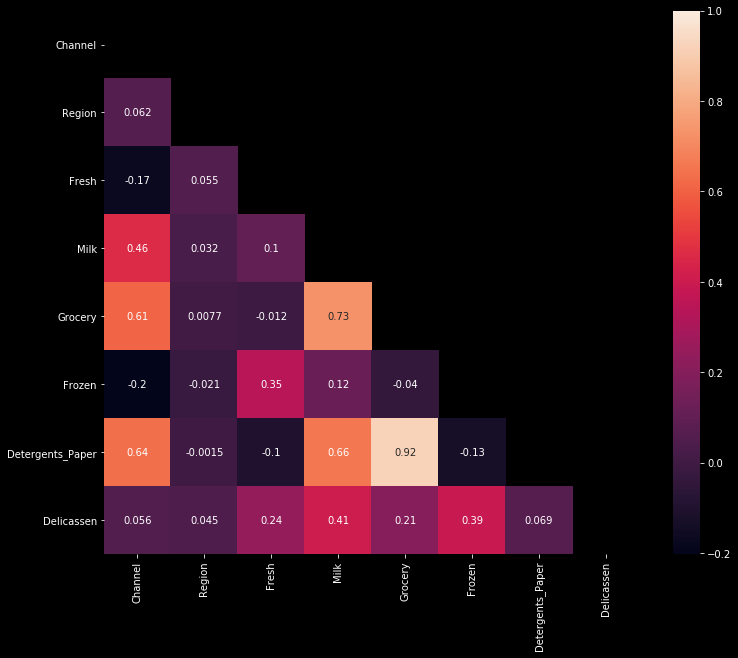

In [4]:
#Correlations

corr_matrix = data.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, mask  = mask)

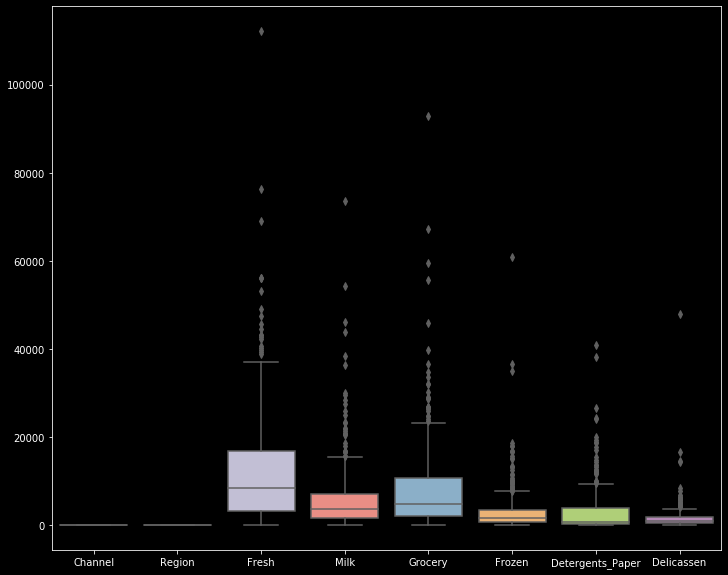

In [5]:
#Outliers

plt.figure(figsize=(12,10))

sns.boxplot(data = data) #Lots of outliers

# Your observations here

- No nulls
- 2 Categorical (Channel, Region), but they are ints
    - 2 Channels
    - 3 Regions
- Fresh, Milk, Grocery, Frozen, Detergents_Paper, Delicassen: 
    * The difference between 75% and max is too much
- Grocery and Detergents_Paper (Will delete Grocery)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [6]:
data_cleaning = data.copy()

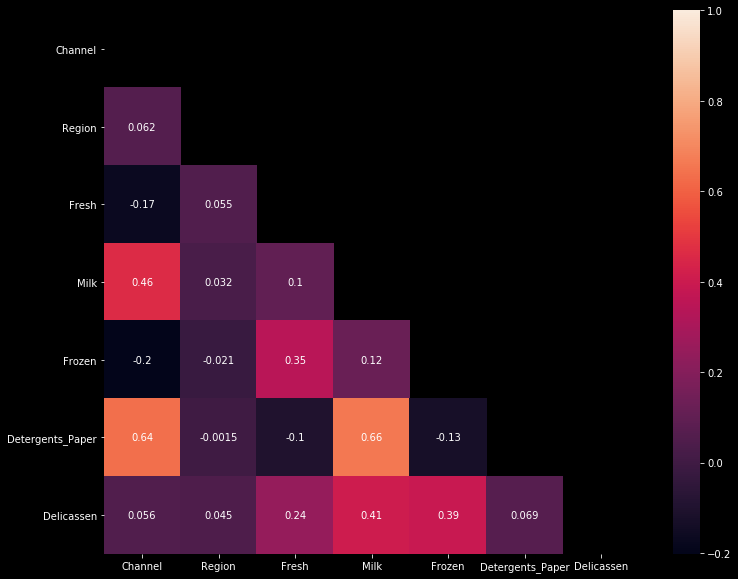

In [7]:
# Your code here
#Removing Correlated Column(s)
data_cleaning.drop('Grocery', axis = 1, inplace=True)

#Reviewing correlations and outliers
corr_matrix = data_cleaning.corr()
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, mask  = mask)

Rows dropped : 111


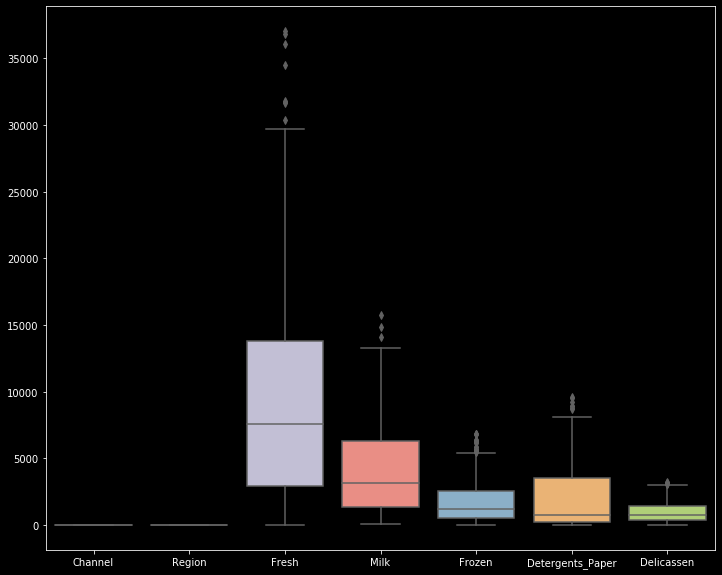

In [8]:
#Threating outliers
columns = data_cleaning.columns[2:]

before = data_cleaning.shape[0]

for col in columns:
    Q1 = np.quantile(data_cleaning[col], 0.25)
    Q3 = np.quantile(data_cleaning[col], 0.75)
    IQR = Q3 - Q1
    lower = Q1 - (1.5*IQR)
    upper = Q3 + (1.5*IQR)

    rows_to_drop = data_cleaning[col][(data_cleaning[col] > upper)].index.to_list()

    data_cleaning.drop(rows_to_drop,inplace=True)

after = data_cleaning.shape[0]

print(f'Rows dropped : {before - after}')
#verifying with boxplot the outliers

plt.figure(figsize=(12,10))

sns.boxplot(data = data_cleaning) #Lots of outliersv

#### Your comment here

* Removing Grocery is usefull because we have a 92% correlation with Detergents_Paper and also because this columns has more stronger correlations than Detergets_Paper
* I removed outliers using the Interquartile Range to create outlier fences

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [9]:
data_cleaned = data_cleaning.copy()

In [10]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler().fit(data_cleaned)

data_scaled = scaler.transform(data_cleaned)

In [11]:
data_scaled = pd.DataFrame(data_scaled, columns = data_cleaned.columns)
data_scaled.describe()

Channel        Region         Fresh          Milk        Frozen  \
count  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02  3.290000e+02   
mean   7.889670e-16 -9.637681e-16  5.736715e-17 -5.163043e-17  1.147343e-17   
std    1.001523e+00  1.001523e+00  1.001523e+00  1.001523e+00  1.001523e+00   
min   -6.466092e-01 -1.996708e+00 -1.167325e+00 -1.195641e+00 -1.102292e+00   
25%   -6.466092e-01 -7.061050e-01 -8.079135e-01 -8.171447e-01 -7.569940e-01   
50%   -6.466092e-01  5.844980e-01 -2.376897e-01 -2.890977e-01 -3.608428e-01   
75%    1.546529e+00  5.844980e-01  5.230994e-01  6.151359e-01  4.766623e-01   
max    1.546529e+00  5.844980e-01  3.376918e+00  3.329569e+00  3.179406e+00   

       Detergents_Paper    Delicassen  
count      3.290000e+02  3.290000e+02  
mean      -2.260941e-17  6.816567e-17  
std        1.001523e+00  1.001523e+00  
min       -8.331165e-01 -1.253531e+00  
25%       -7.399947e-01 -8.005727e-01  
50%       -5.248792e-01 -3.057440e-01  
75%        6.039687e-01  5.811412e-01  
max        3.071900e+00  2.892879e+00

# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [12]:
# Your code here:
kmeans_model = KMeans().fit(data_scaled)
data_scaled['labels'] = kmeans_model.labels_

In [13]:
data_scaled

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
0    1.546529  0.584498  0.386894  1.576245 -0.983635          0.253034   
1    1.546529  0.584498 -0.301743  1.620706 -0.011778          0.504747   
2   -0.646609  0.584498  0.460028 -0.866225  2.902539         -0.628167   
3    1.546529  0.584498 -0.012643  1.172920 -0.699863         -0.104408   
4    1.546529  0.584498  0.320263 -0.287943 -0.816636          0.442530   
..        ...       ...       ...       ...       ...               ...   
324 -0.646609  0.584498  1.423530 -0.876041 -0.949105         -0.294311   
325 -0.646609  0.584498 -0.924486 -0.282457 -0.150525         -0.689571   
326 -0.646609  0.584498  0.885333 -0.079207 -0.686051          0.129820   
327 -0.646609  0.584498  0.094971 -0.639589 -0.466316         -0.766020   
328 -0.646609  0.584498 -0.825706 -0.721294 -1.077180         -0.640367   

     Delicassen  labels  
0      0.440305       2  
1      0.996036       2  
2      1.011262       4  
3      0.583679       2  
4     -0.565846       0  
..          ...     ...  
324   -0.756165       3  
325    0.581141       1  
326   -0.194090       3  
327    1.438844       7  
328   -1.191360       1  

[329 rows x 8 columns]

Count the values in `labels`.

In [14]:
# Your code here:
data_scaled['labels'].value_counts()

1    93
6    42
5    39
4    36
3    35
2    34
0    26
7    24
Name: labels, dtype: int64

# Challenge 4 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [15]:
# Your code here
kmeans_model = DBSCAN(eps=0.5).fit(data_scaled)
data_scaled['labels_DBSCAN'] = kmeans_model.labels_

Count the values in `labels_DBSCAN`.

In [16]:
# Your code here
data_scaled['labels_DBSCAN'].value_counts()

-1    297
 0     27
 1      5
Name: labels_DBSCAN, dtype: int64

# Challenge 5 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

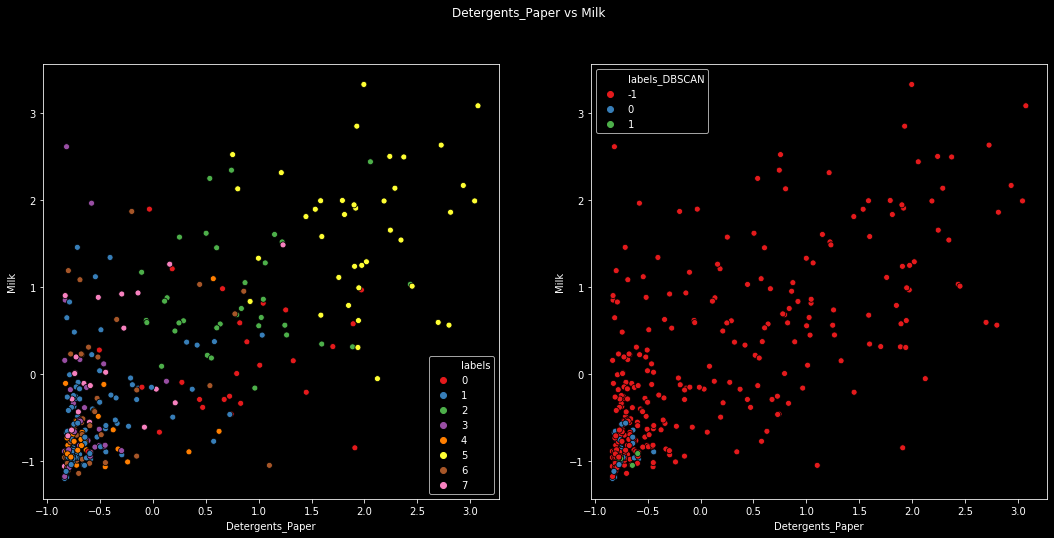

In [17]:
# Your code here:
x = 'Detergents_Paper'
y = 'Milk'

fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle(f'{x} vs {y}')

sns.scatterplot(ax=ax1, 
                x=x, 
                y=y, 
                data = data_scaled, 
                hue = 'labels', 
                palette = sns.color_palette("Set1", 8), 
                ec = 'black')
sns.scatterplot(ax=ax2, 
                x=x, 
                y=y, 
                data = data_scaled, 
                hue = 'labels_DBSCAN', 
                palette = sns.color_palette("Set1", 3), 
                ec = 'black')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

In [18]:
# Your code here:


Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

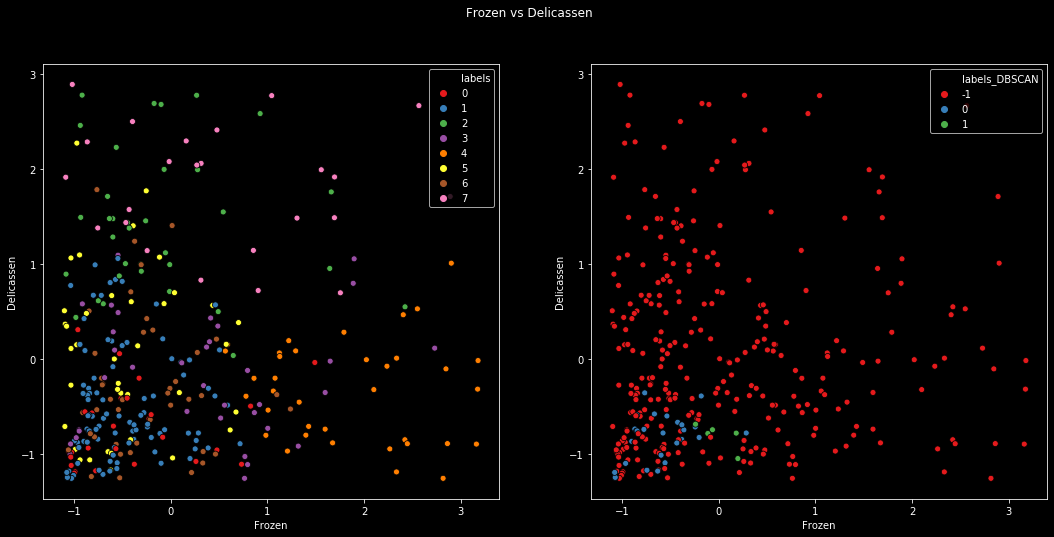

In [19]:
# Your code here:

x = 'Frozen'
y = 'Delicassen'

fig, (ax1,ax2)  = plt.subplots(1, 2, figsize=(18,8))
fig.suptitle(f'{x} vs {y}')

sns.scatterplot(ax=ax1, 
                x=x, 
                y=y, 
                data = data_scaled, 
                hue = 'labels', 
                palette = sns.color_palette("Set1", 8), 
                ec = 'black')
sns.scatterplot(ax=ax2, 
                x=x, 
                y=y, 
                data = data_scaled, 
                hue = 'labels_DBSCAN', 
                palette = sns.color_palette("Set1", 3), 
                ec = 'black')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [20]:
# Your code here:
display(data_scaled.groupby(['labels']).mean())

display(data_scaled.groupby(['labels_DBSCAN']).mean())

Channel    Region     Fresh      Milk    Frozen  Detergents_Paper  \
labels                                                                       
0       1.546529  0.286667 -0.106114  0.161664 -0.405925          0.765110   
1      -0.646609  0.515111 -0.524677 -0.498687 -0.485265         -0.542597   
2       1.546529  0.356745  0.281488  0.901398 -0.108480          0.772966   
3      -0.646609  0.326377  1.717731 -0.416905  0.299511         -0.653693   
4      -0.585689 -0.240054 -0.191112 -0.684138  1.838009         -0.562517   
5       1.377826 -0.044257 -0.669958  1.661110 -0.484667          1.985792   
6      -0.646609 -1.873793  0.055921 -0.347286 -0.258928         -0.472790   
7      -0.646609  0.423173  0.521770  0.022936  0.520740         -0.423794   

        Delicassen  labels_DBSCAN  
labels                             
0        -0.723567      -1.000000  
1        -0.474507      -0.602151  
2         1.425522      -1.000000  
3        -0.195142      -1.000000  
4        -0.327948      -1.000000  
5         0.040831      -1.000000  
6        -0.284869      -1.000000  
7         1.811763      -1.000000

Channel    Region     Fresh      Milk    Frozen  \
labels_DBSCAN                                                     
-1             0.069668 -0.062976  0.058651  0.096264  0.056276   
 0            -0.646609  0.584498 -0.653542 -0.882788 -0.617573   
 1            -0.646609  0.584498  0.045250 -0.951047 -0.007885   

               Detergents_Paper  Delicassen    labels  
labels_DBSCAN                                          
-1                     0.078464    0.089277  3.343434  
 0                    -0.734377   -0.832762  1.000000  
 1                    -0.695101   -0.806155  1.000000

Which algorithm appears to perform better?

In [21]:
# Your observations here

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

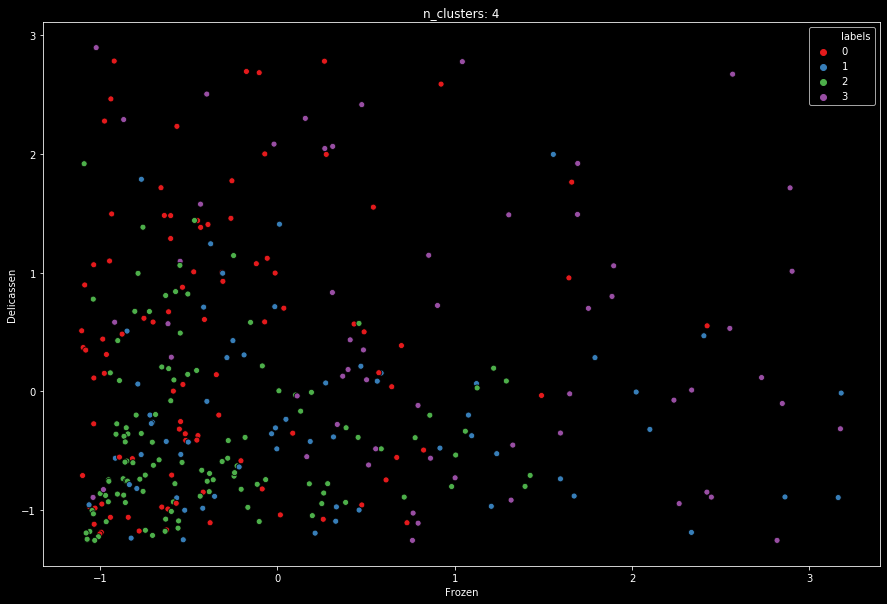

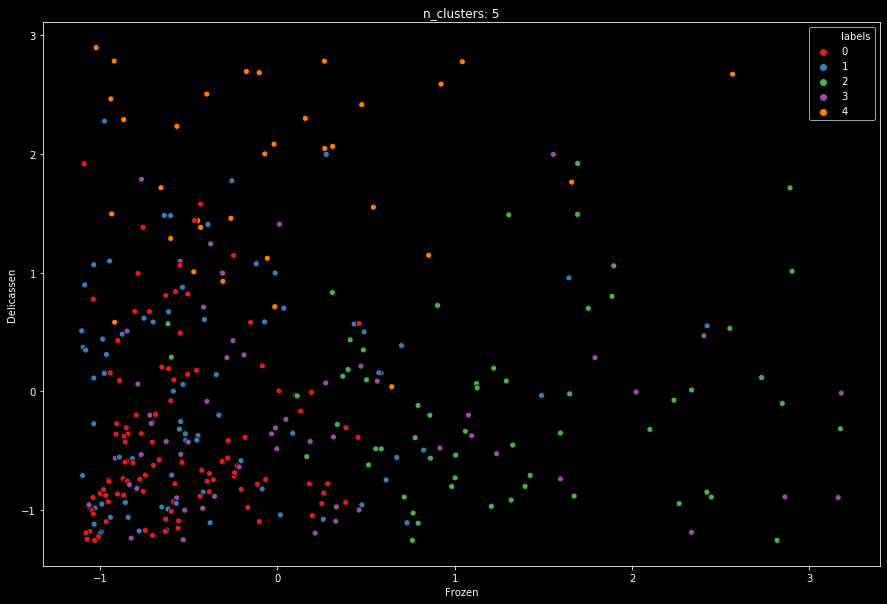

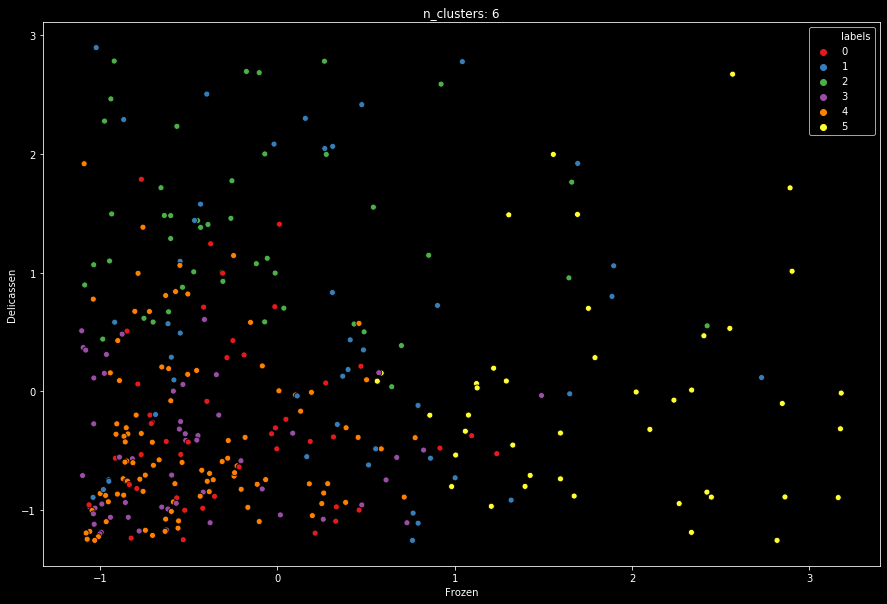

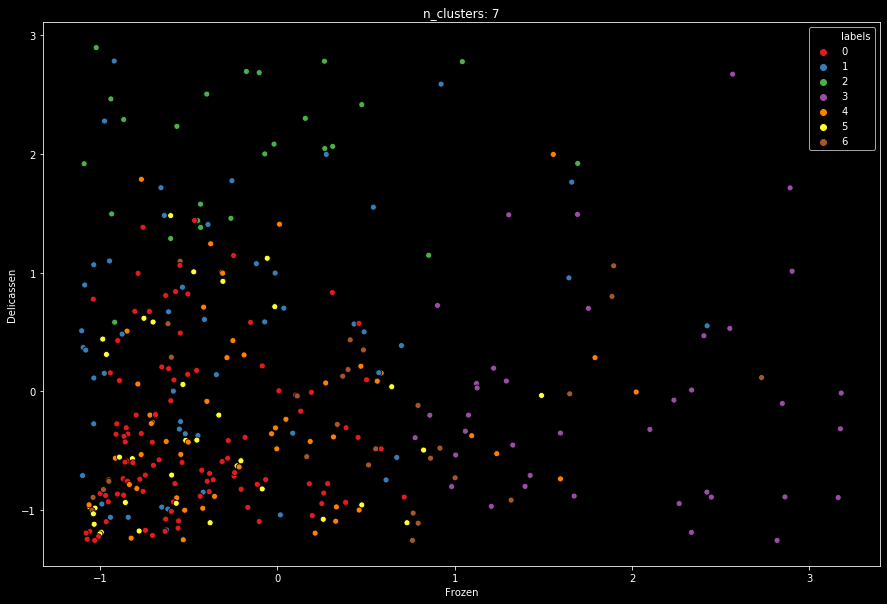

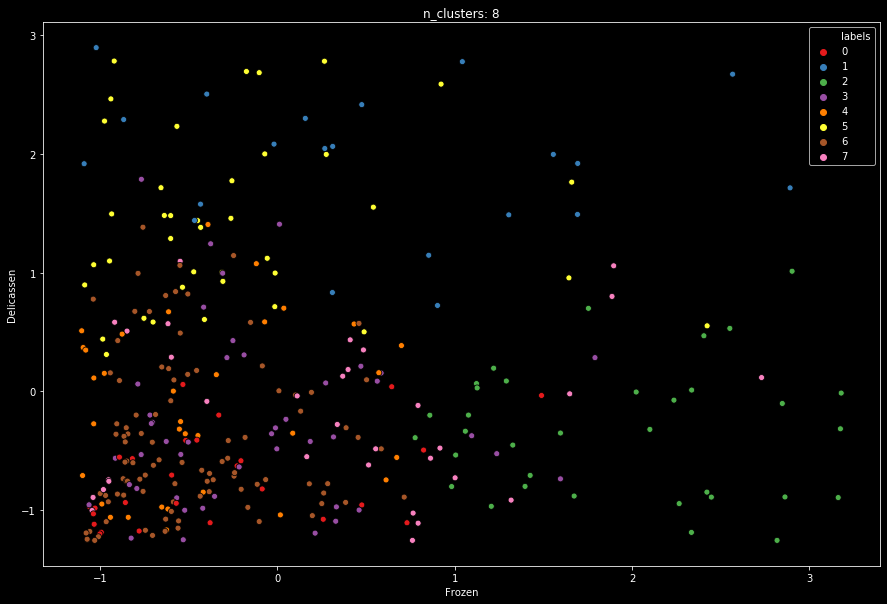

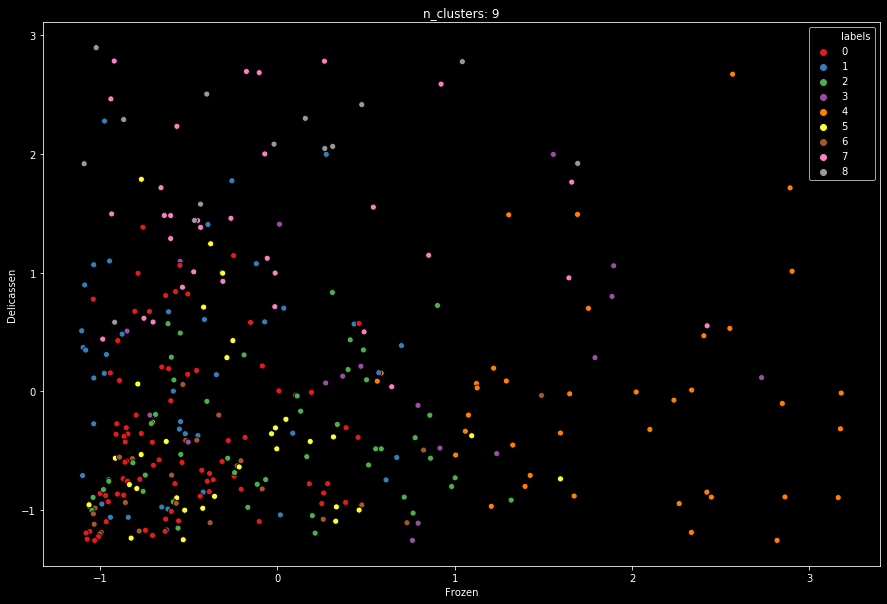

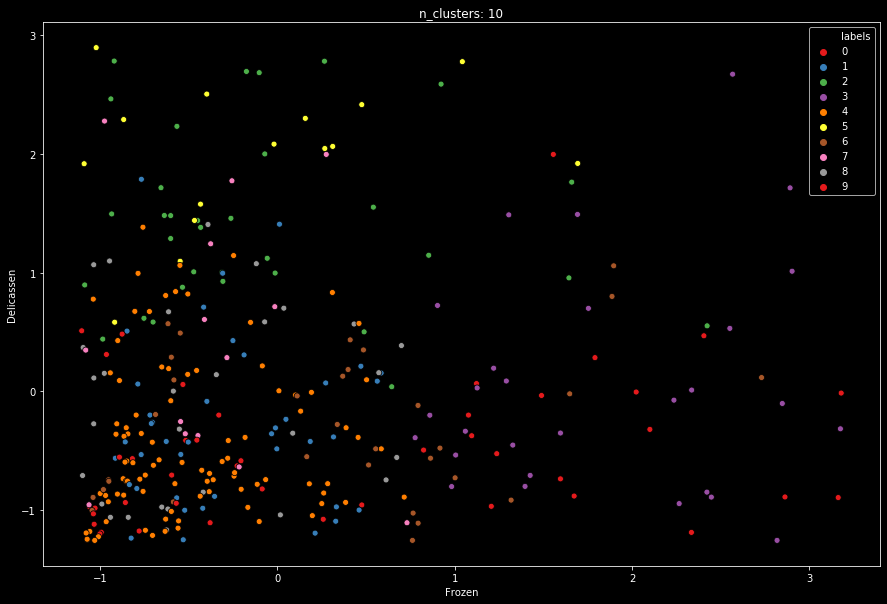

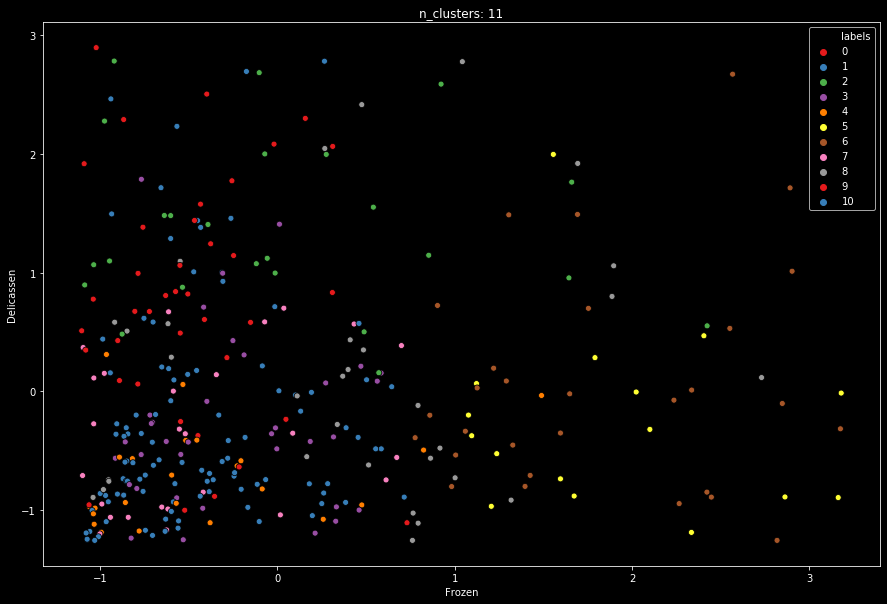

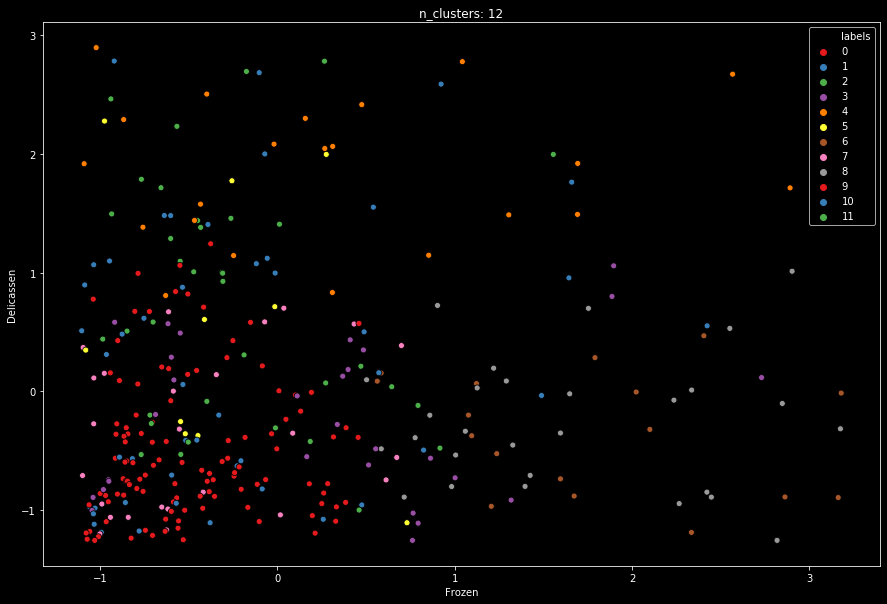

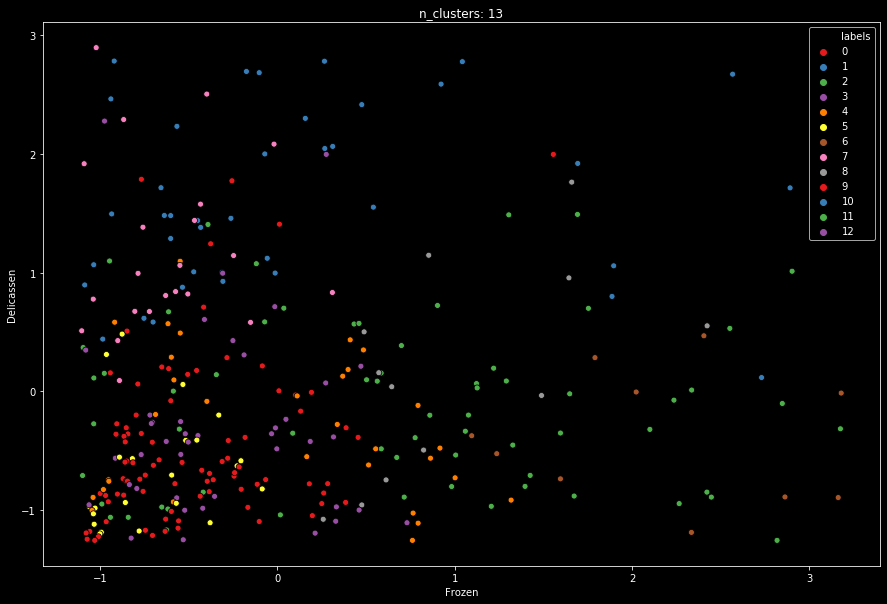

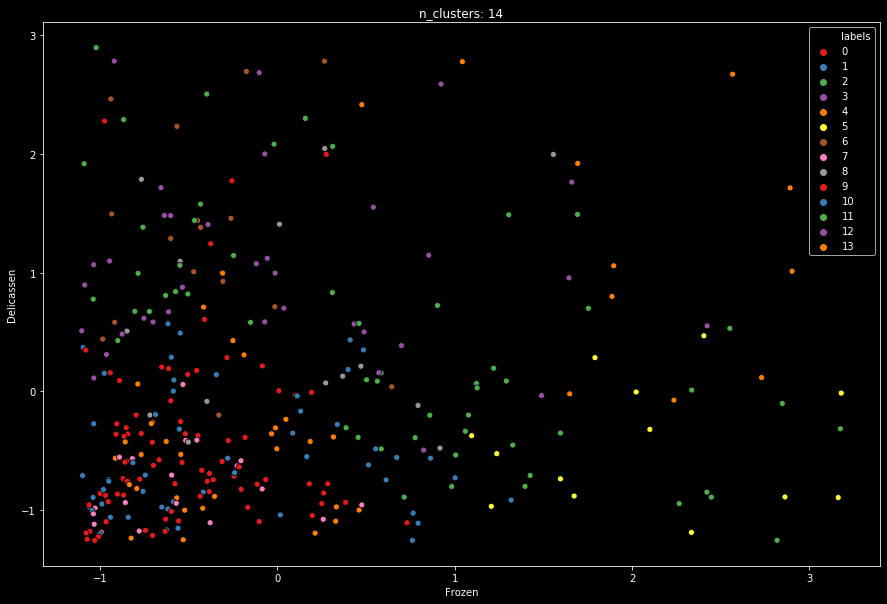

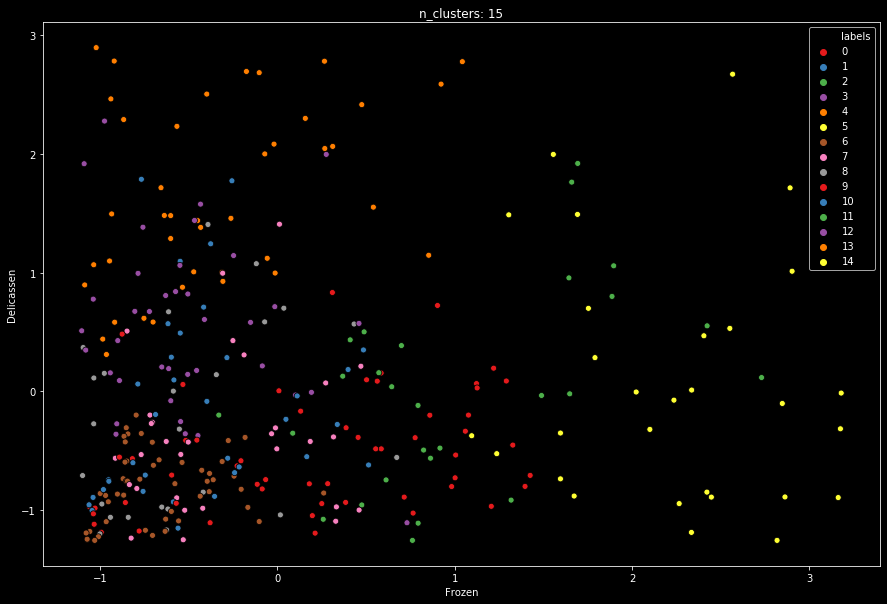

In [79]:
# Your code here

for n in range(4,16):
    data_bonus = data_scaled.drop(data_scaled.columns[-2:], axis = 1)
    
    kmeans_model = KMeans(n_clusters=n).fit(data_bonus) 
    data_bonus['labels'] = kmeans_model.labels_
    
    #plotting
    
    fig, scatter = plt.subplots(figsize = (15,10))
    x = 'Frozen'
    y = 'Delicassen'

    scatter = sns.scatterplot(
                    x=x, 
                    y=y, 
                    data = data_bonus, 
                    hue = 'labels', 
                    palette = sns.color_palette("Set1", n), 
                    ec = 'black')
    scatter.set_title(f'n_clusters: {n}')

In [ ]:
# Your comment here
#Like 6 - 9 

# Bonus Challenge 3 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
C:\Users\Emilio\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.

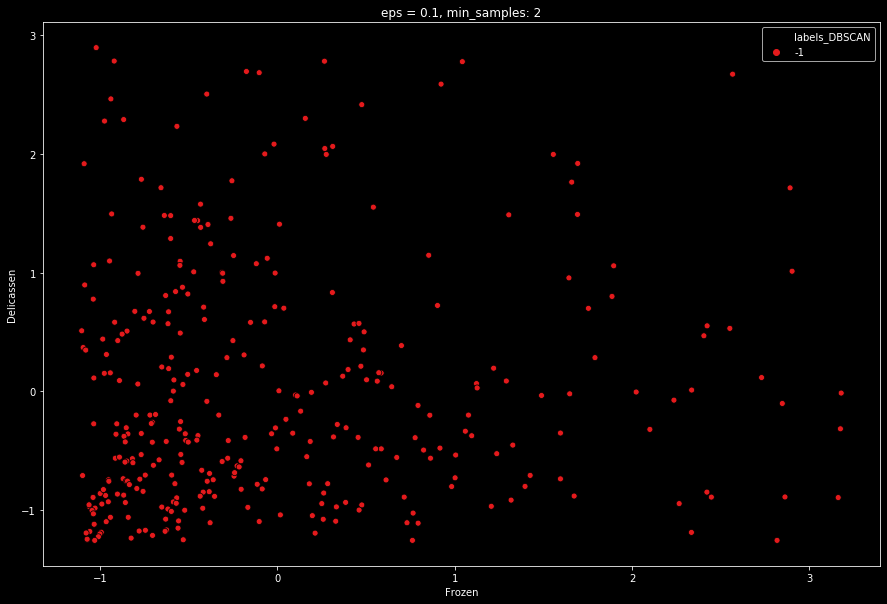

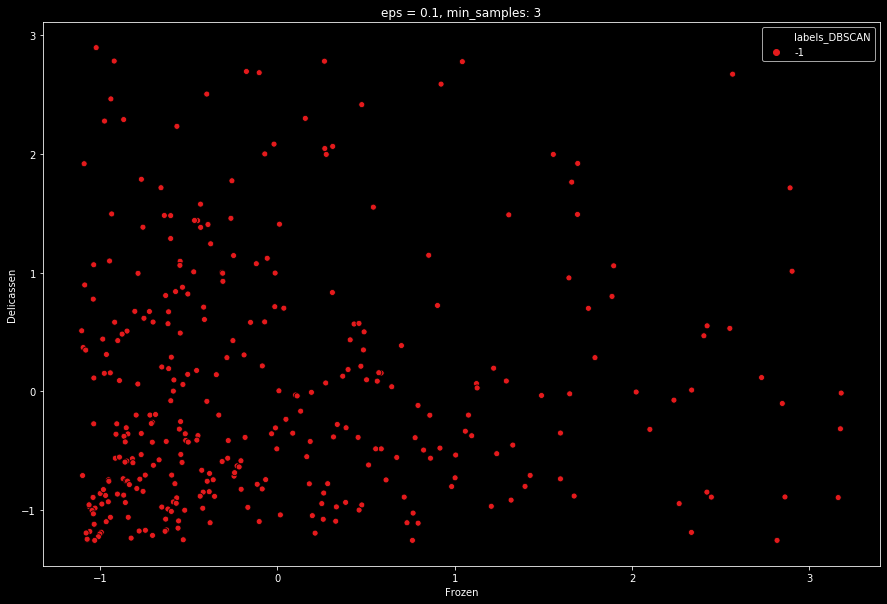

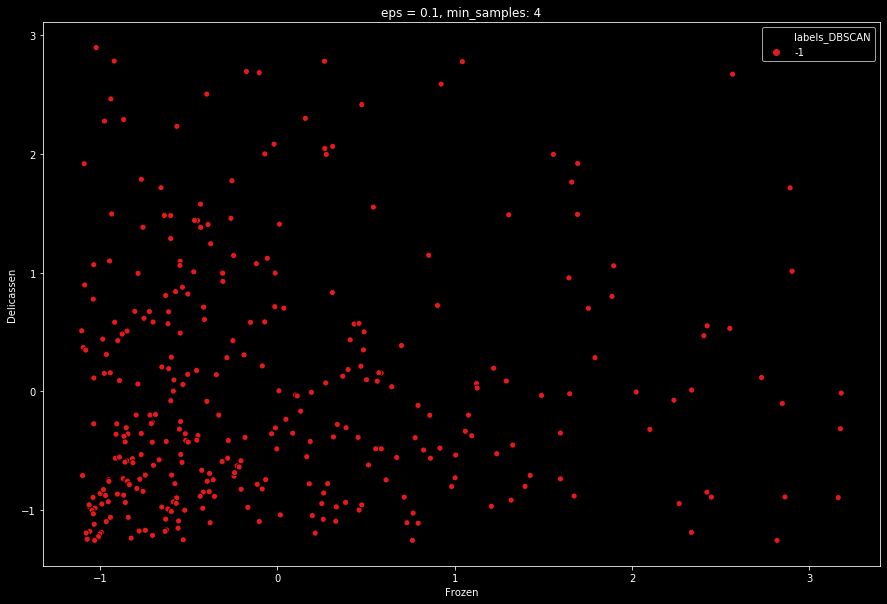

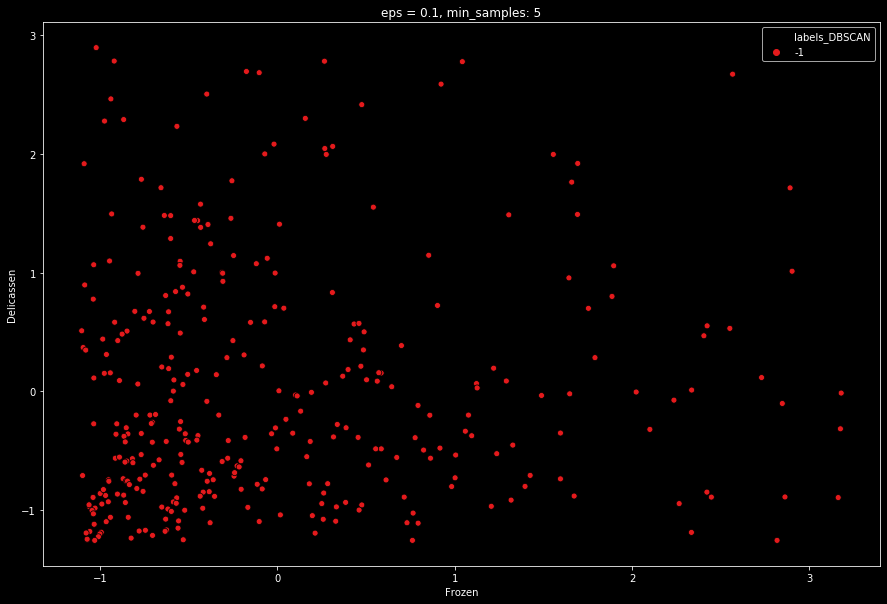

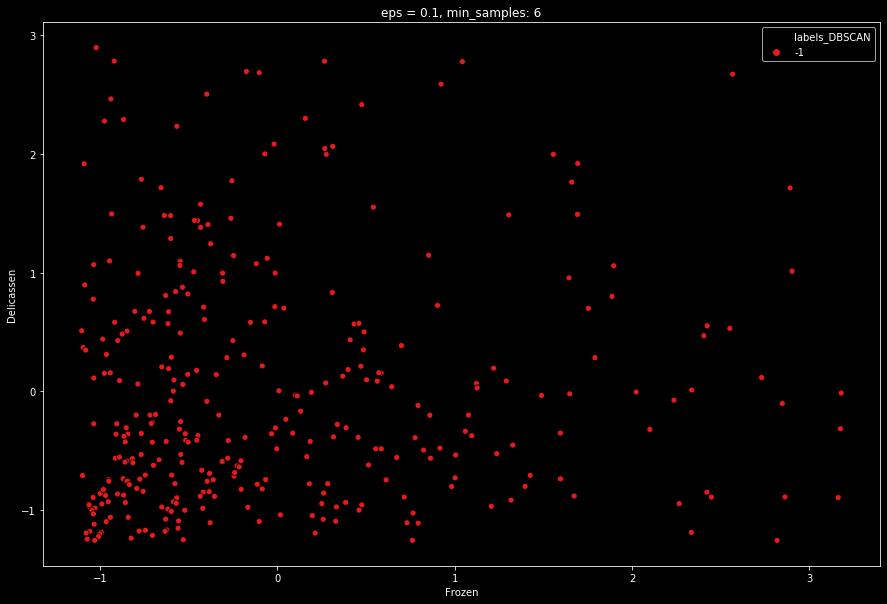

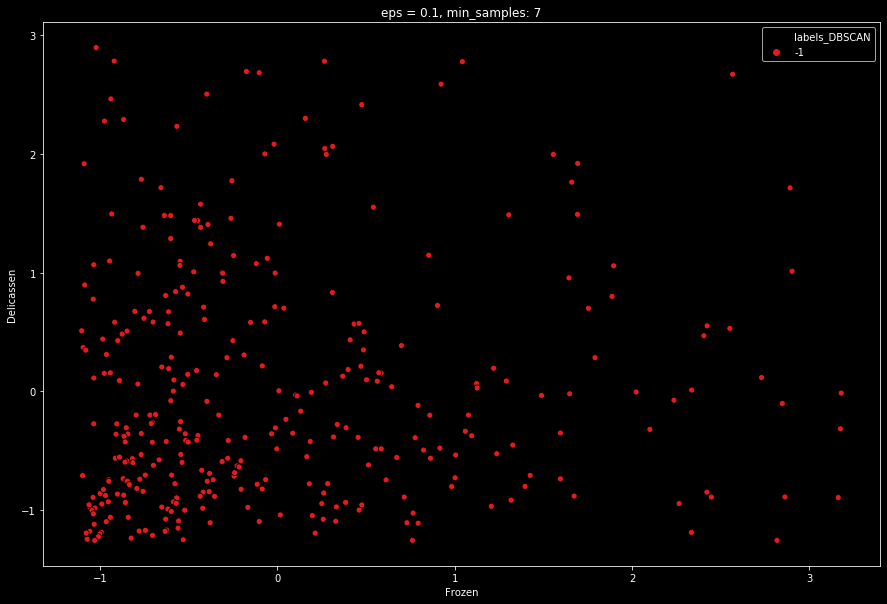

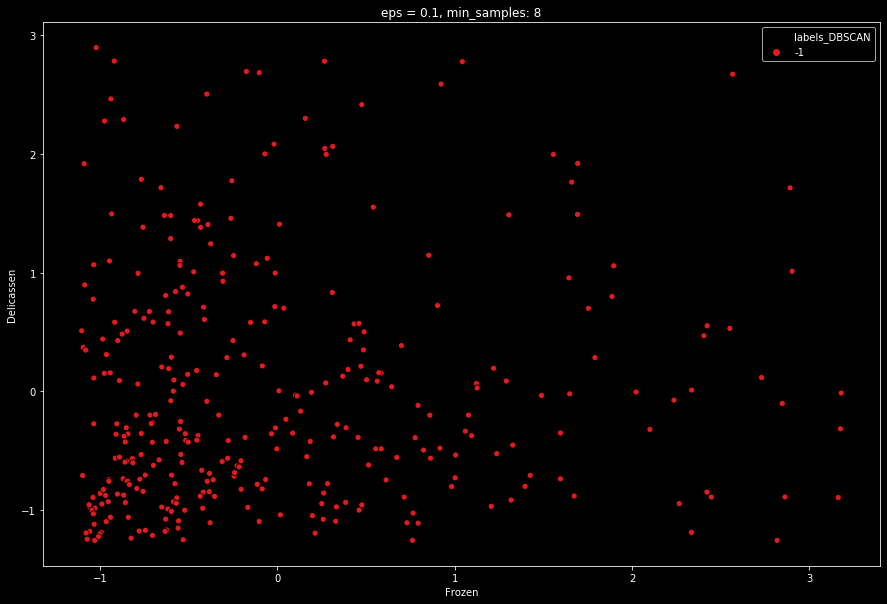

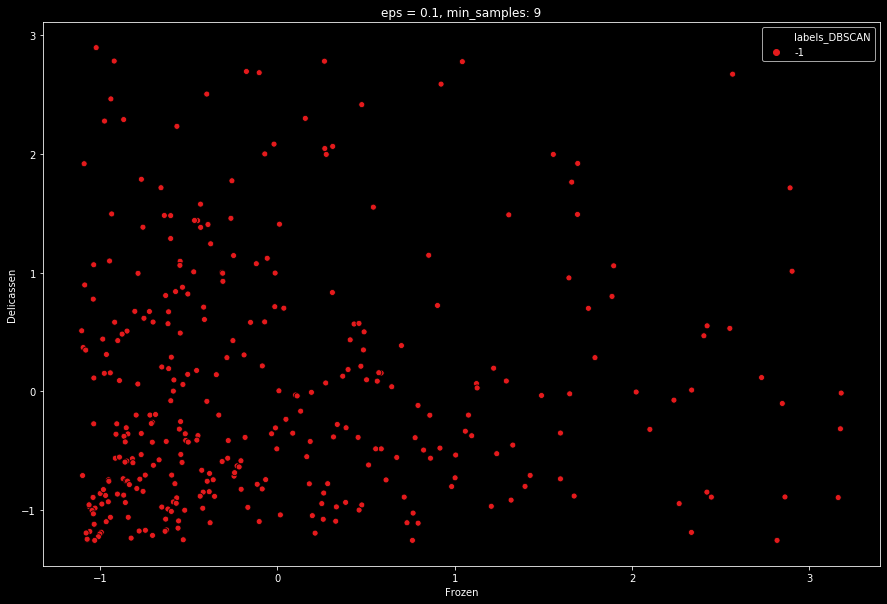

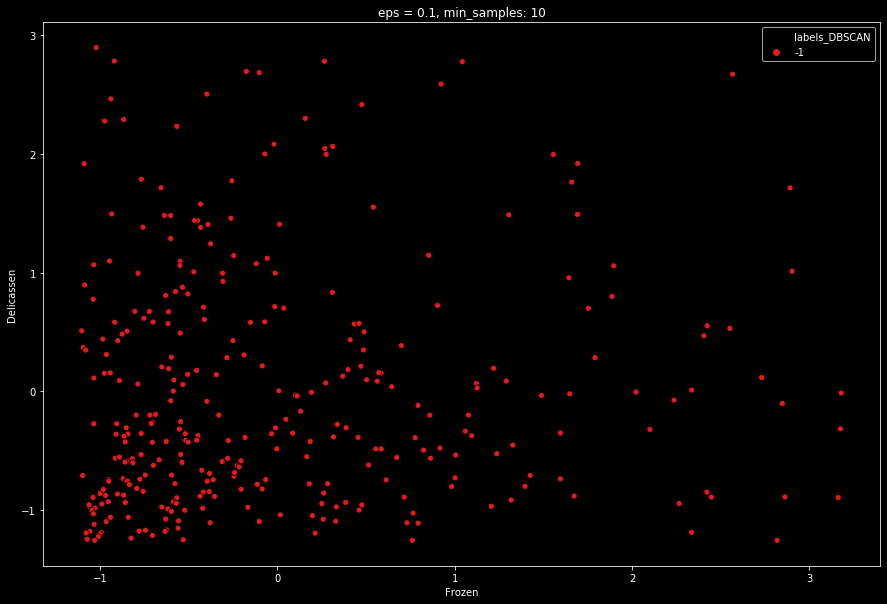

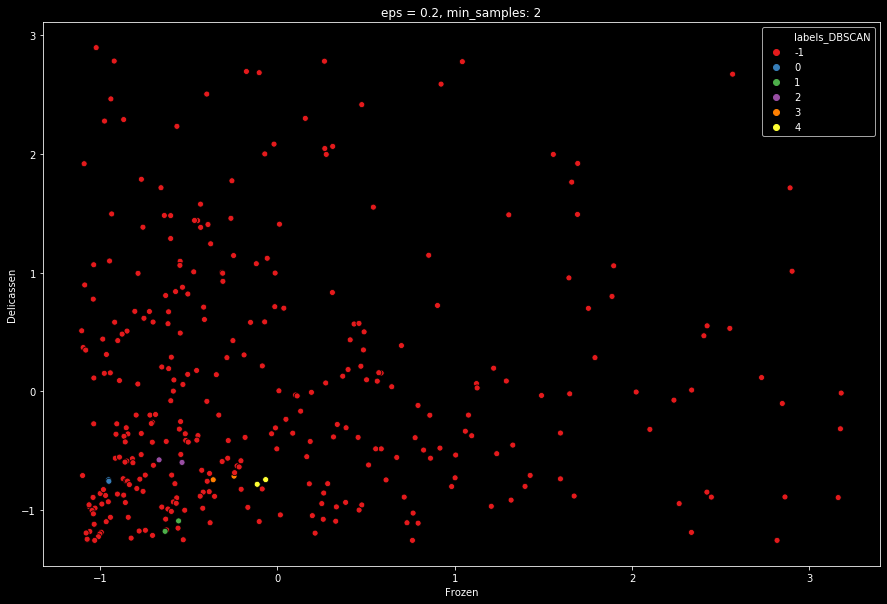

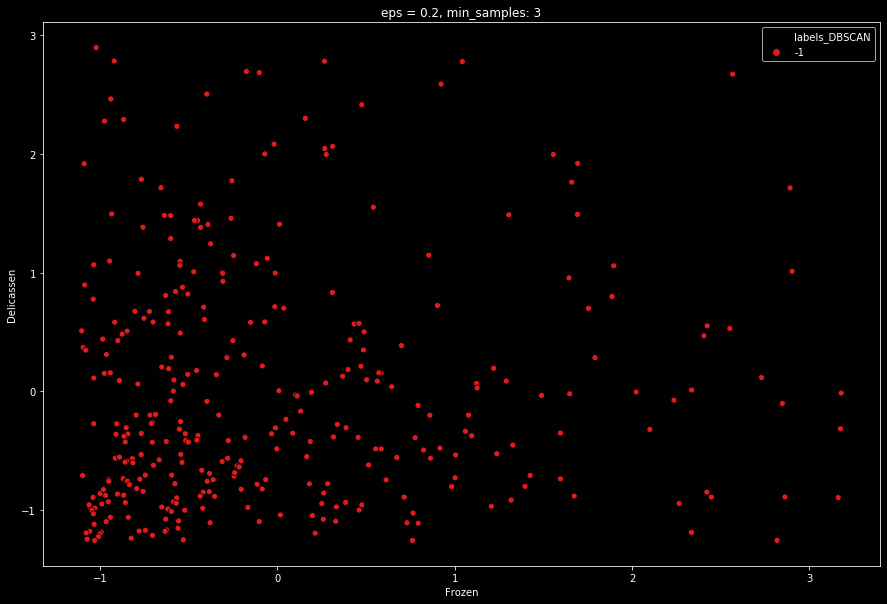

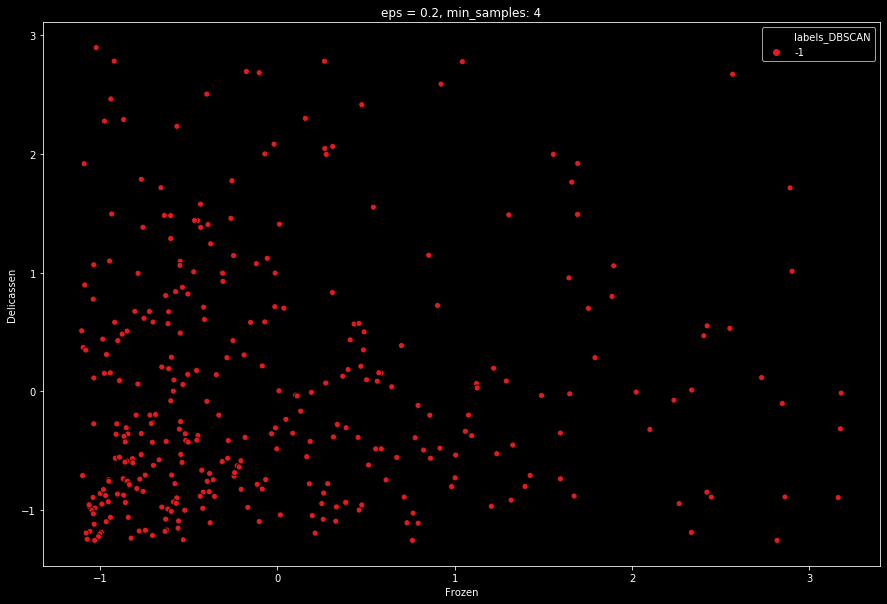

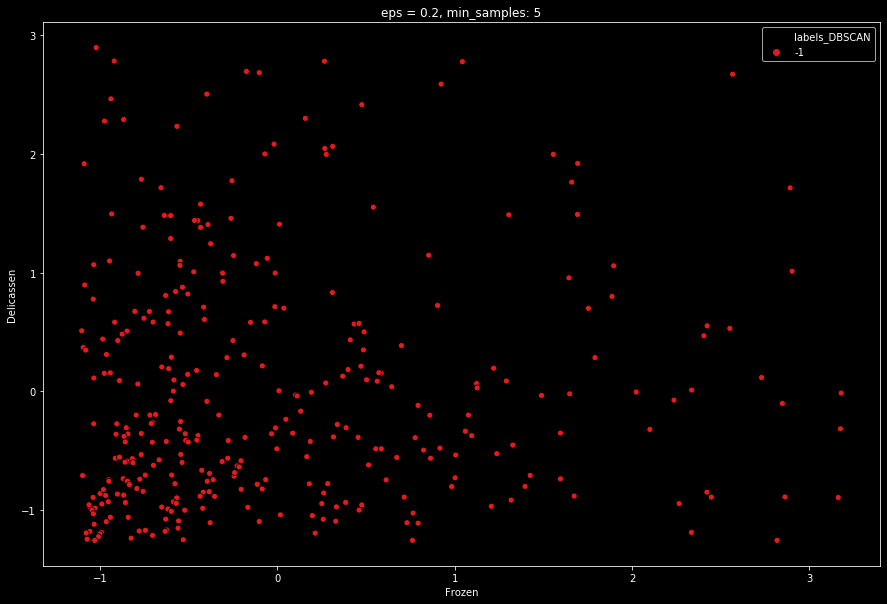

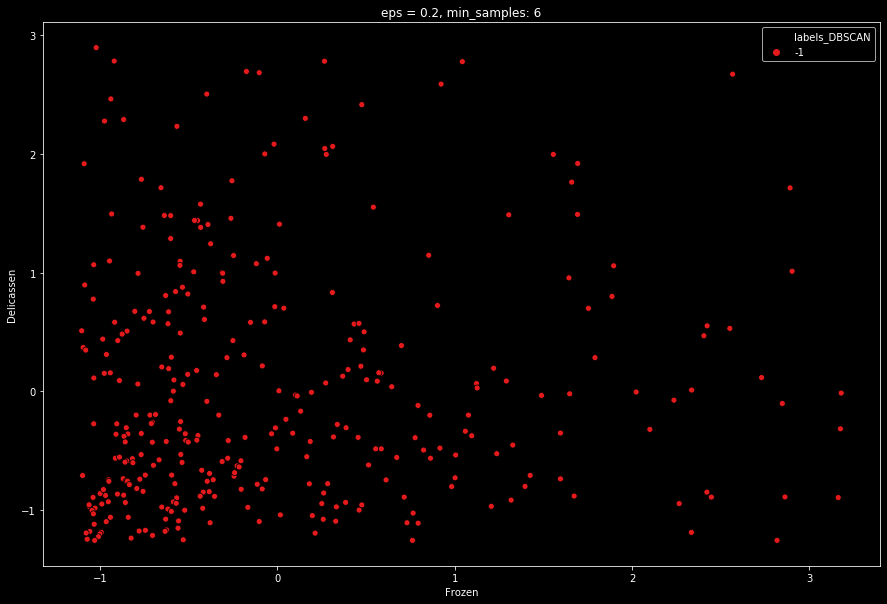

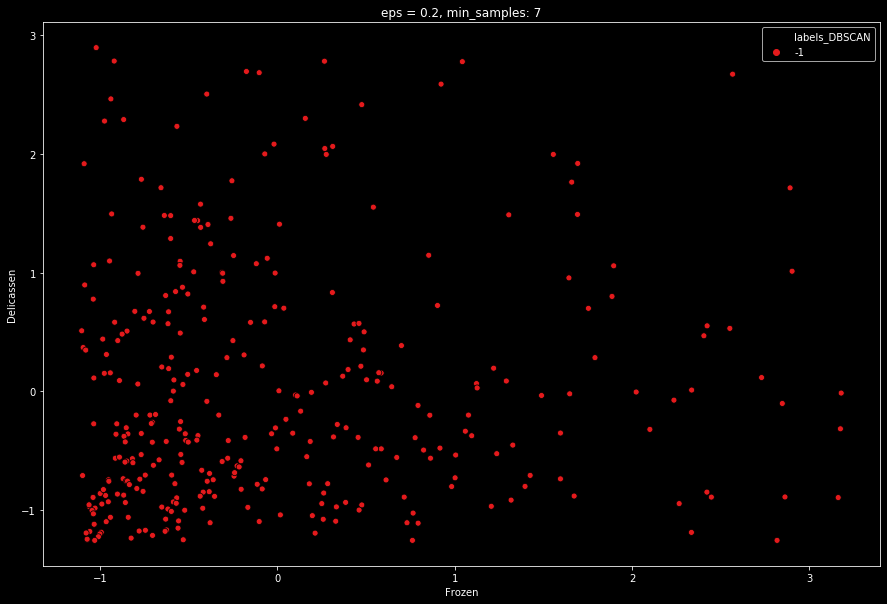

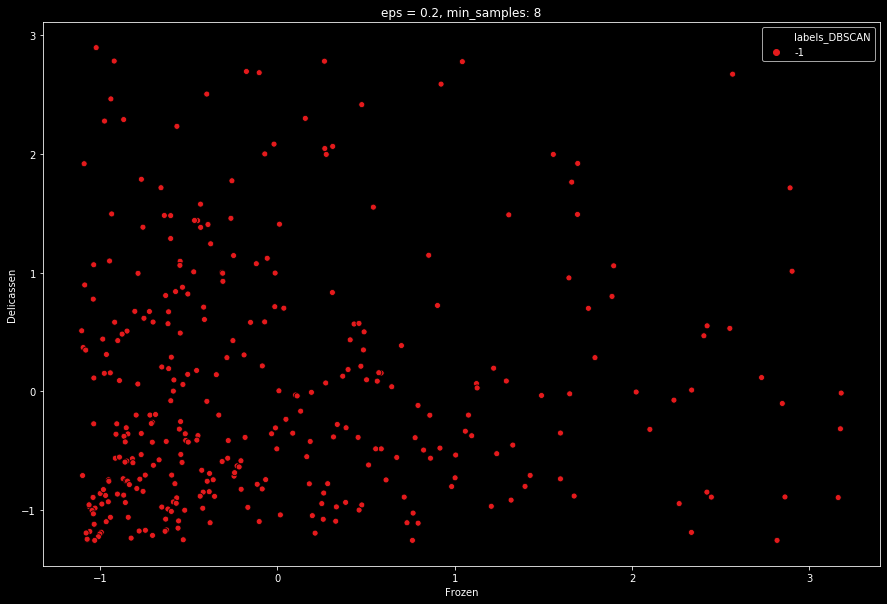

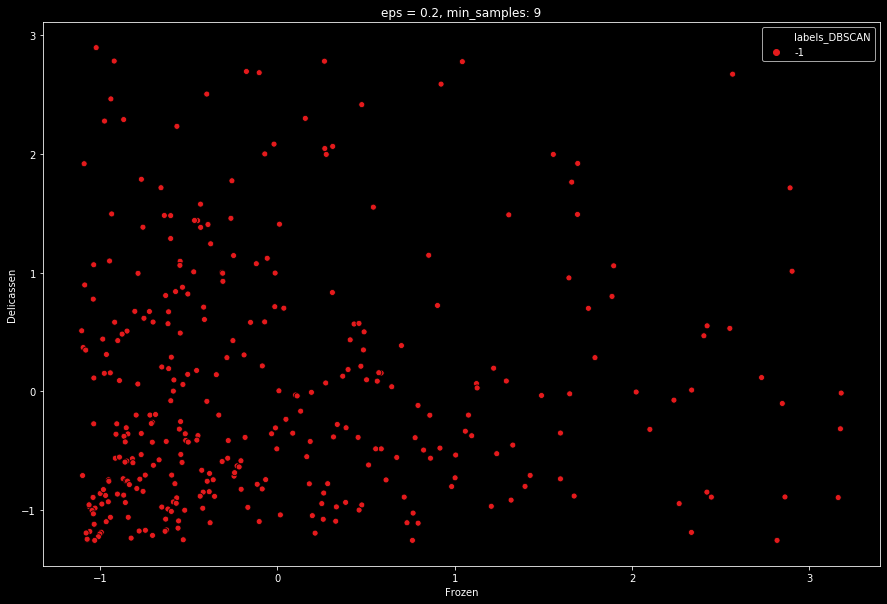

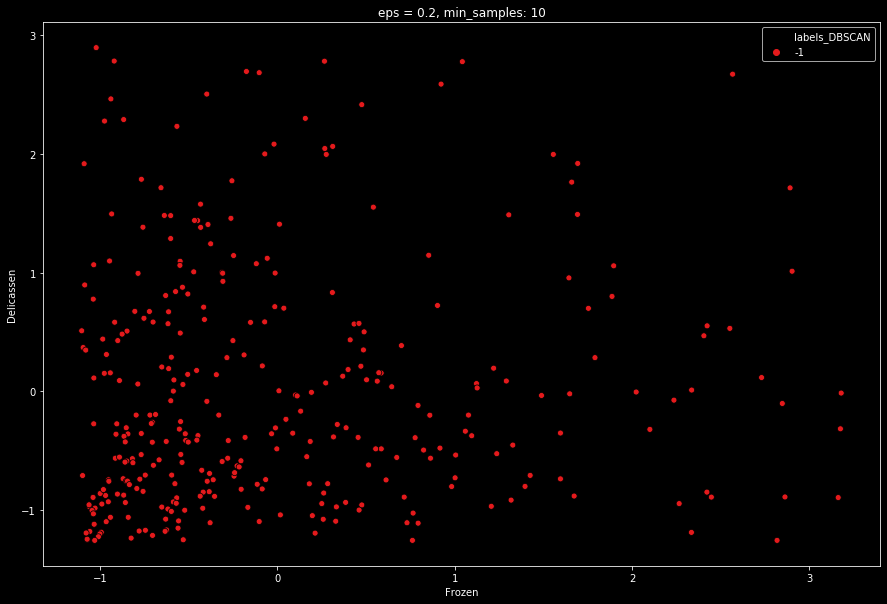

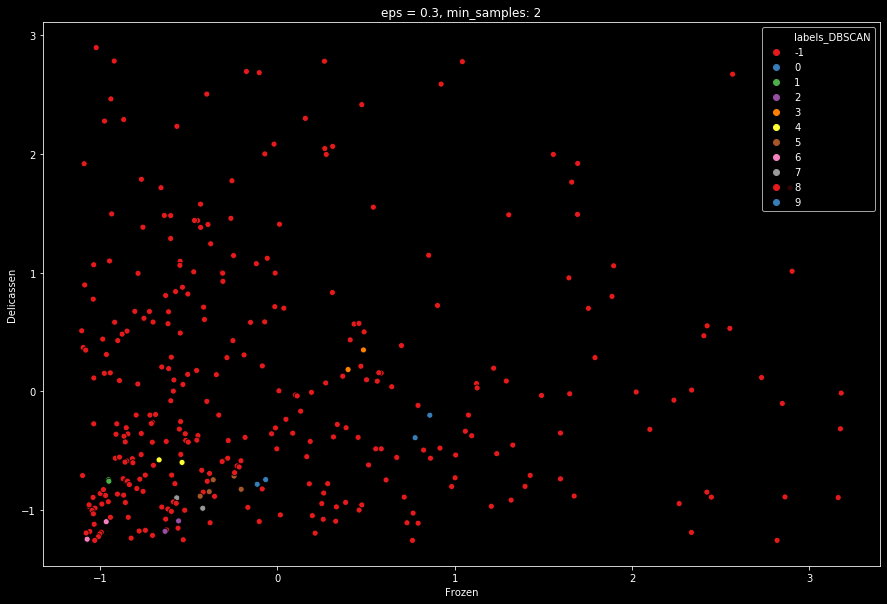

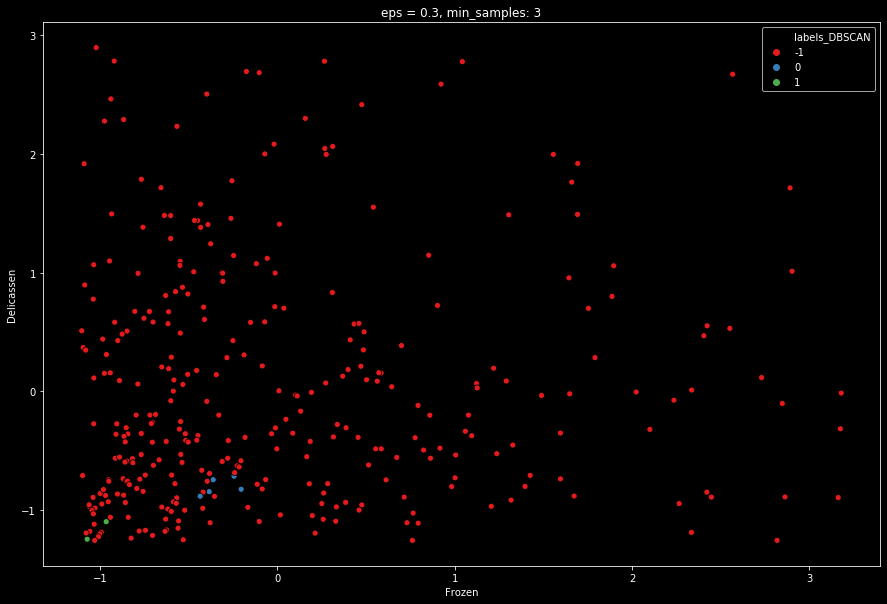

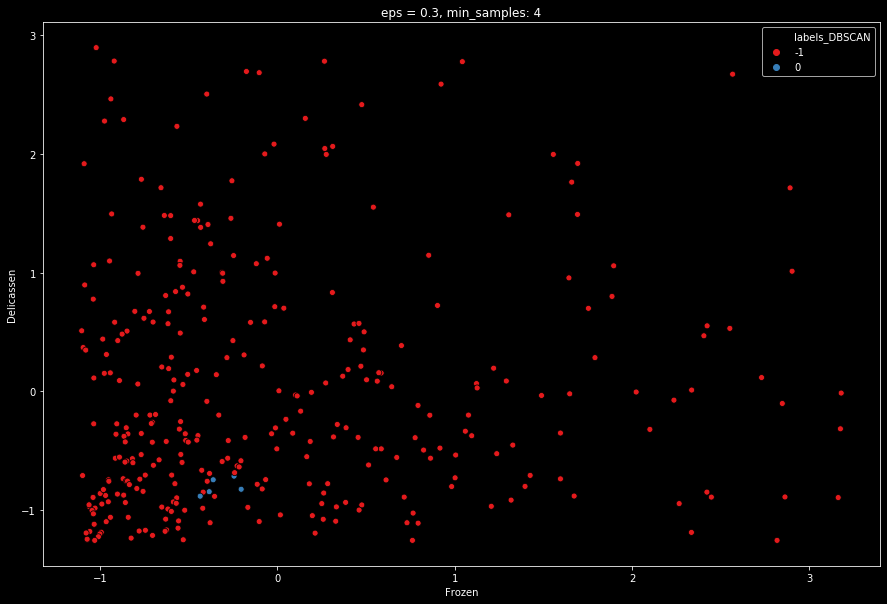

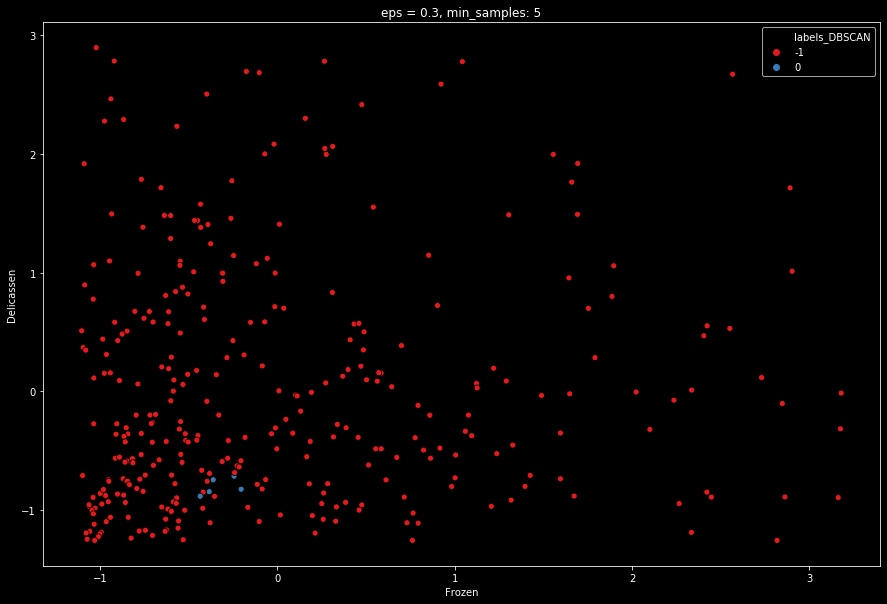

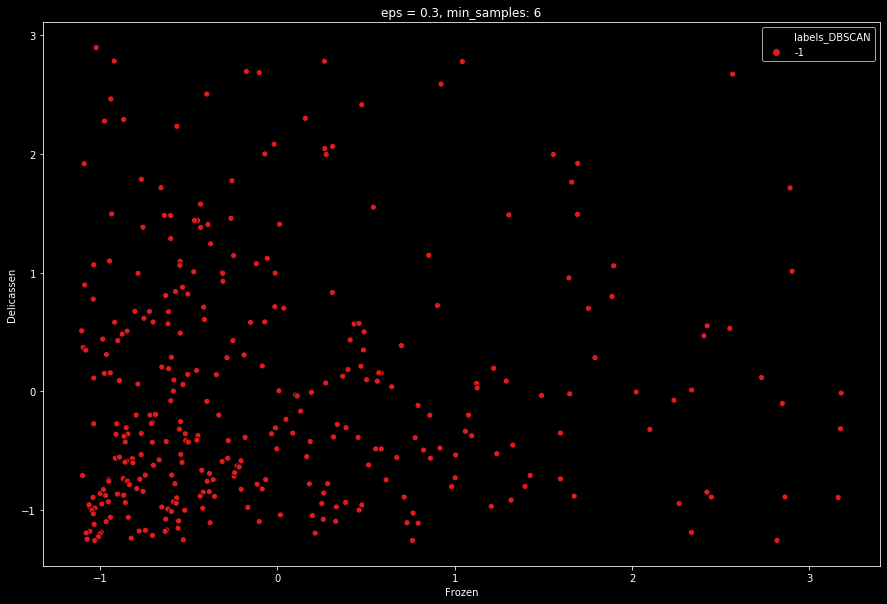

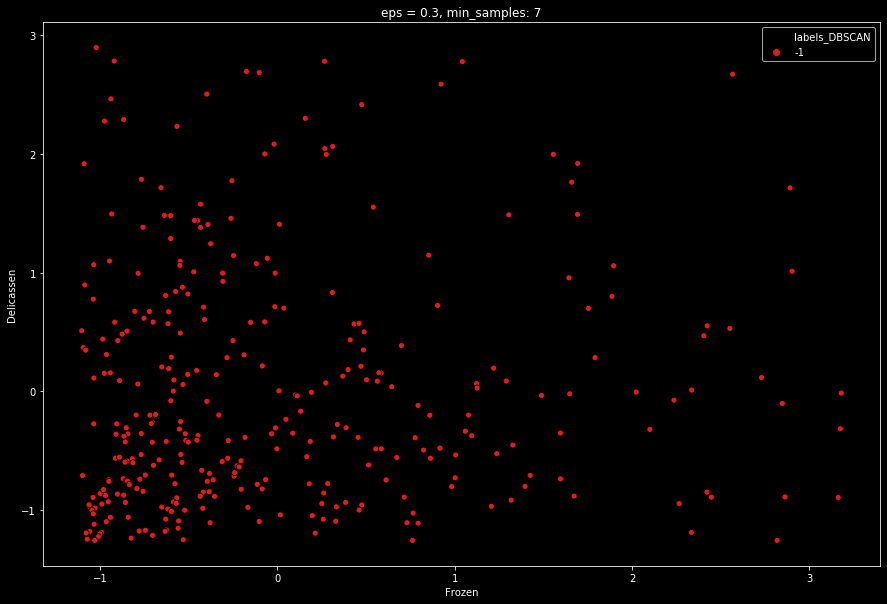

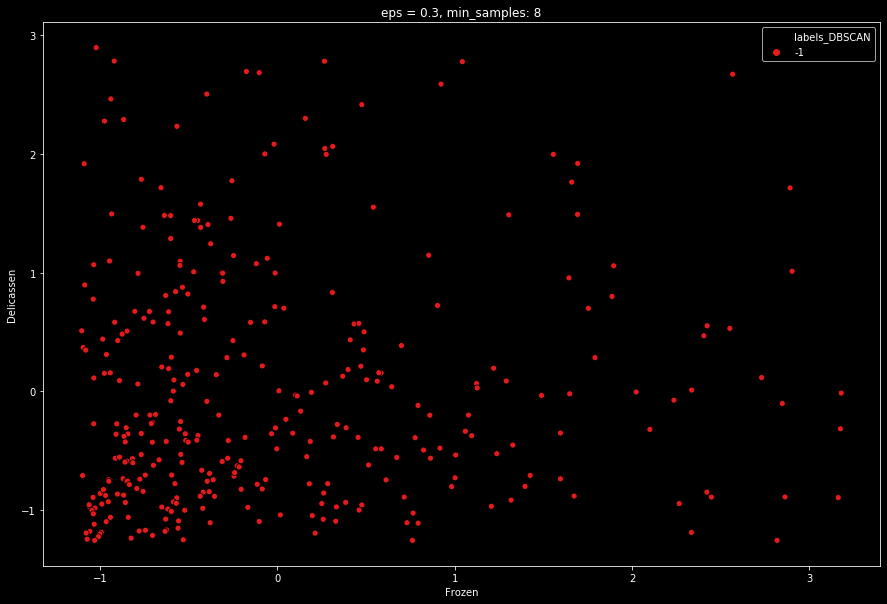

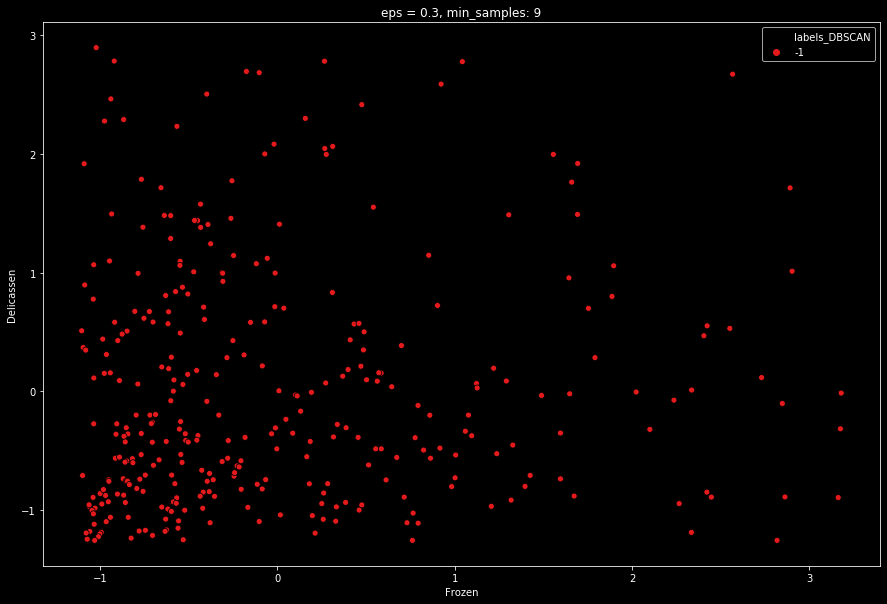

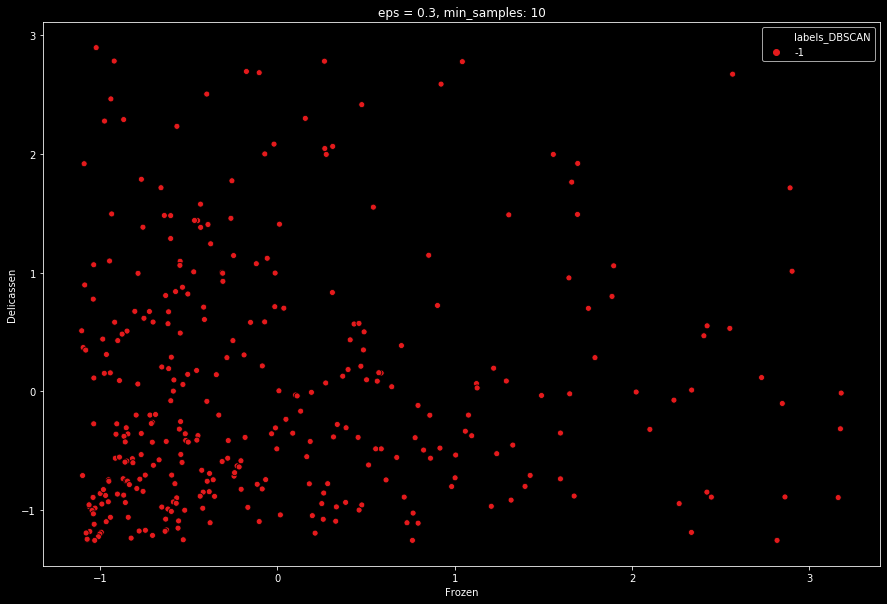

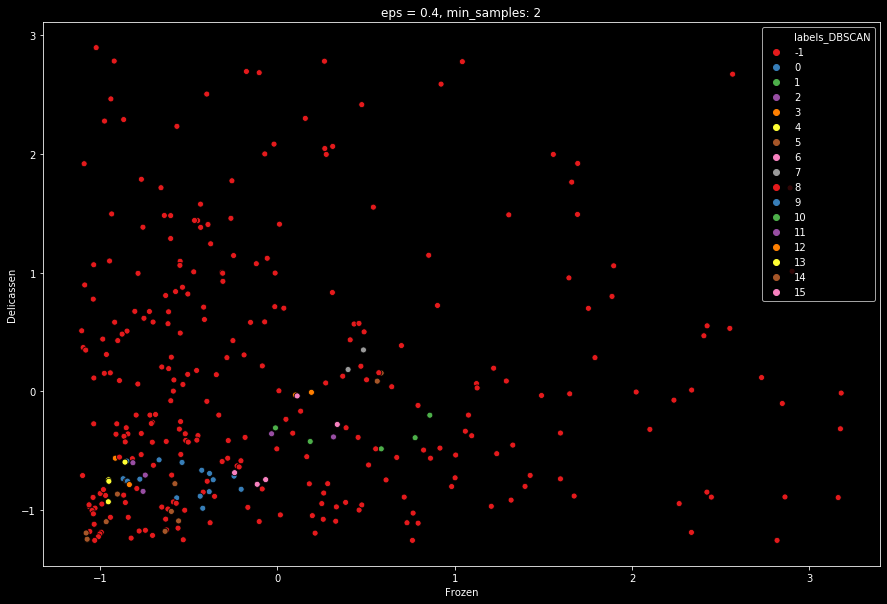

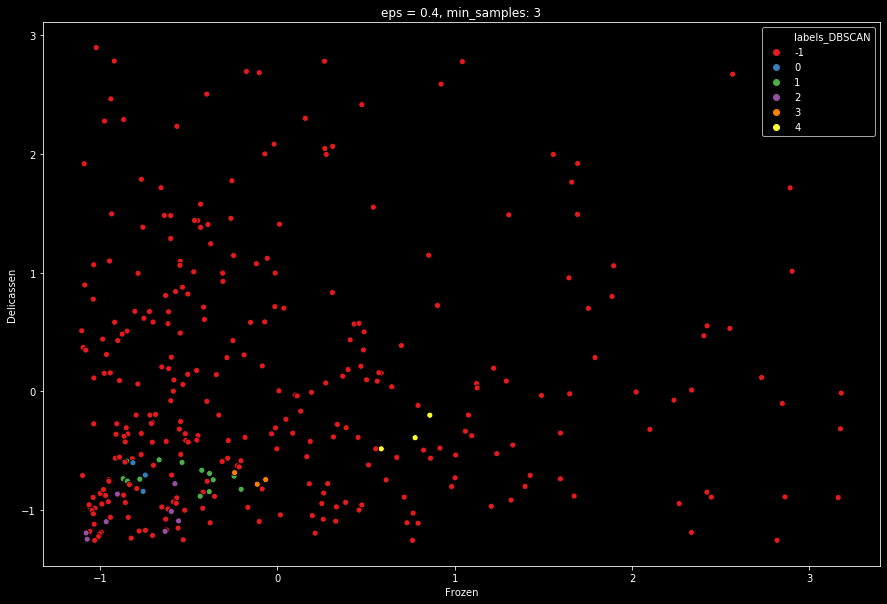

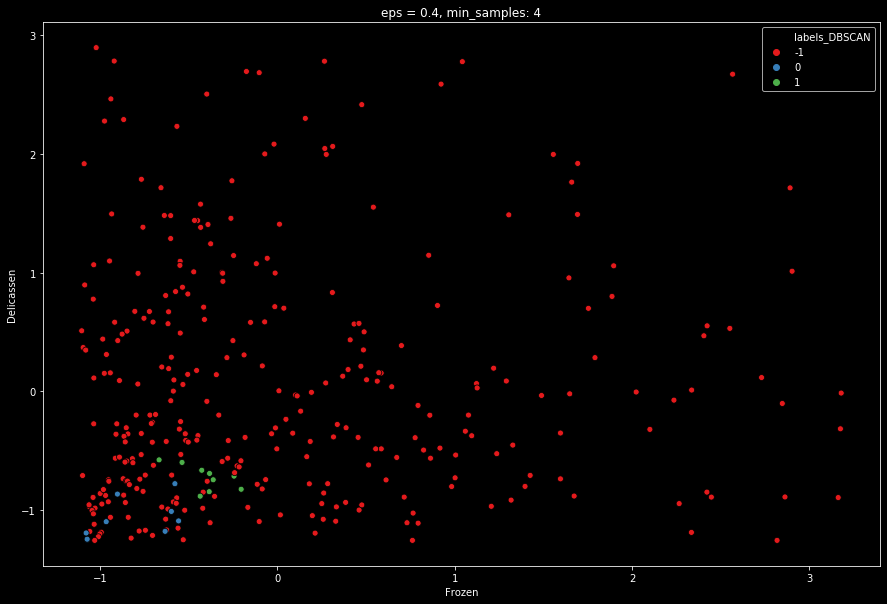

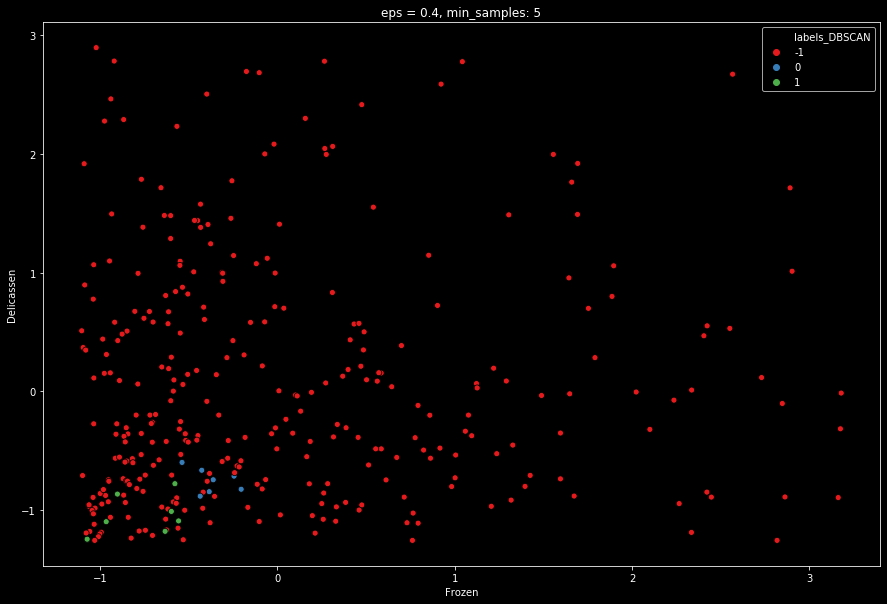

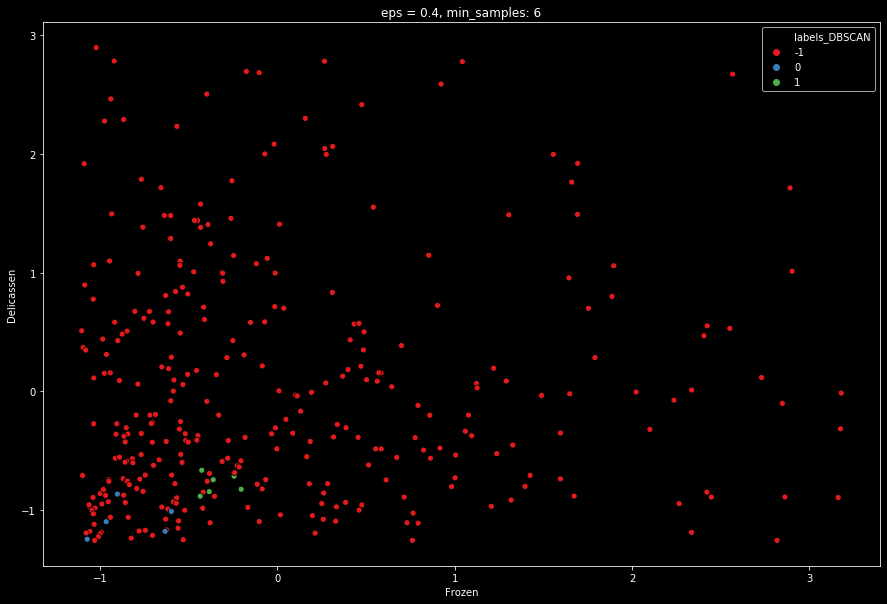

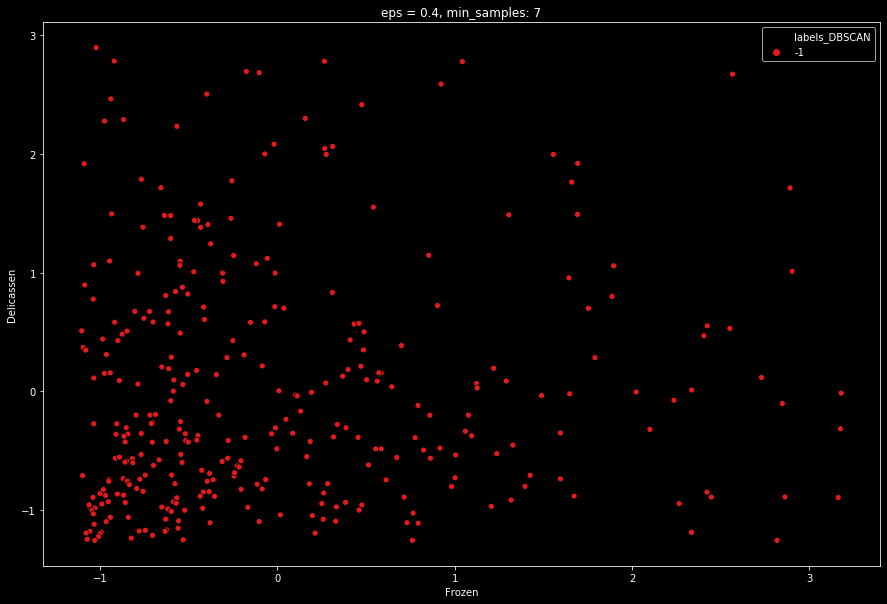

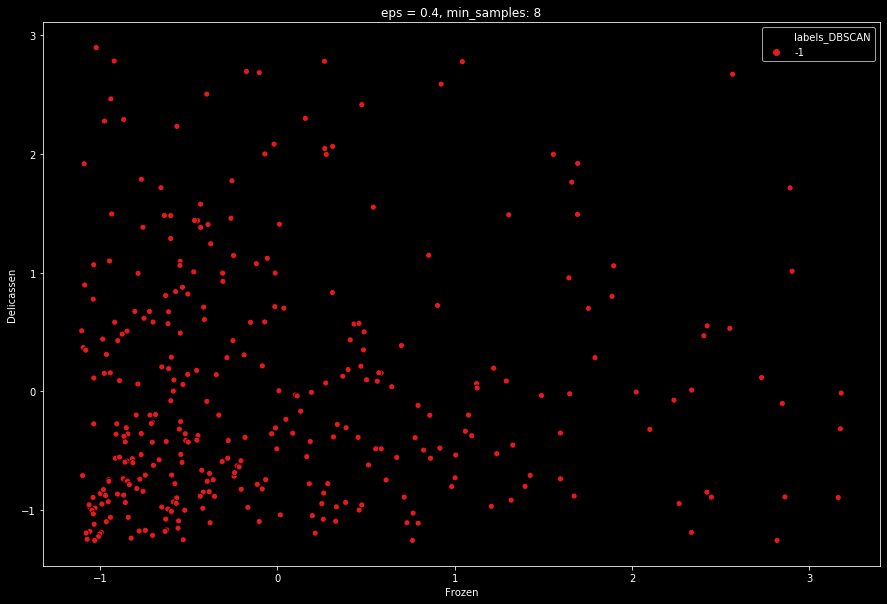

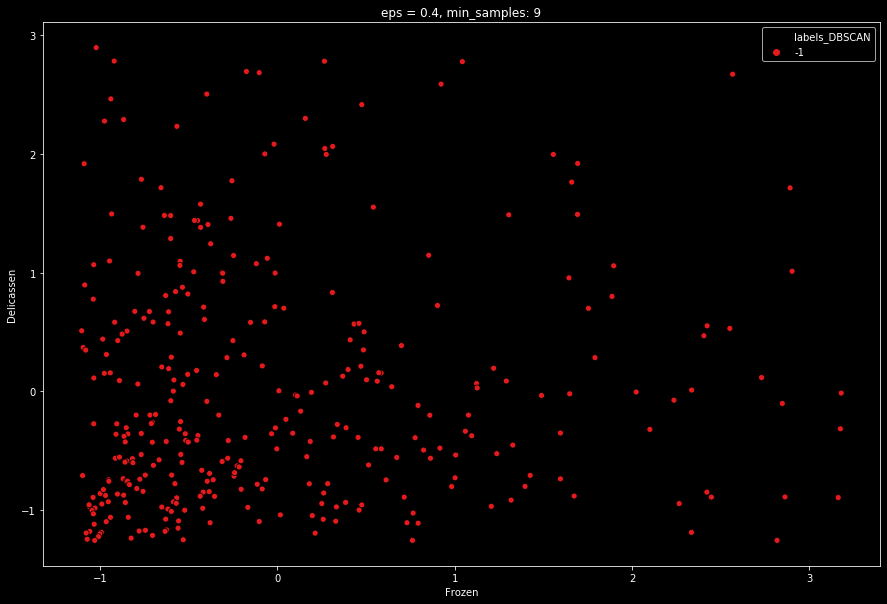

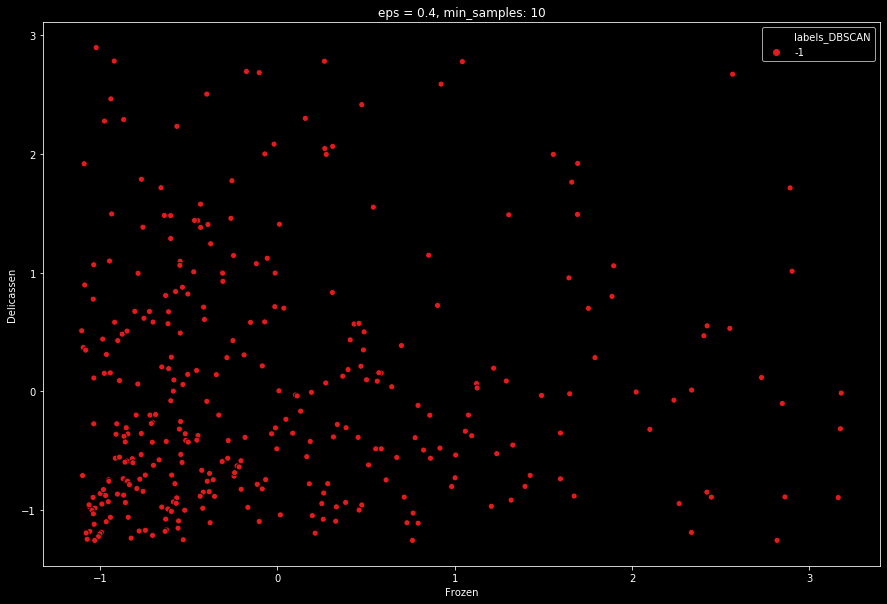

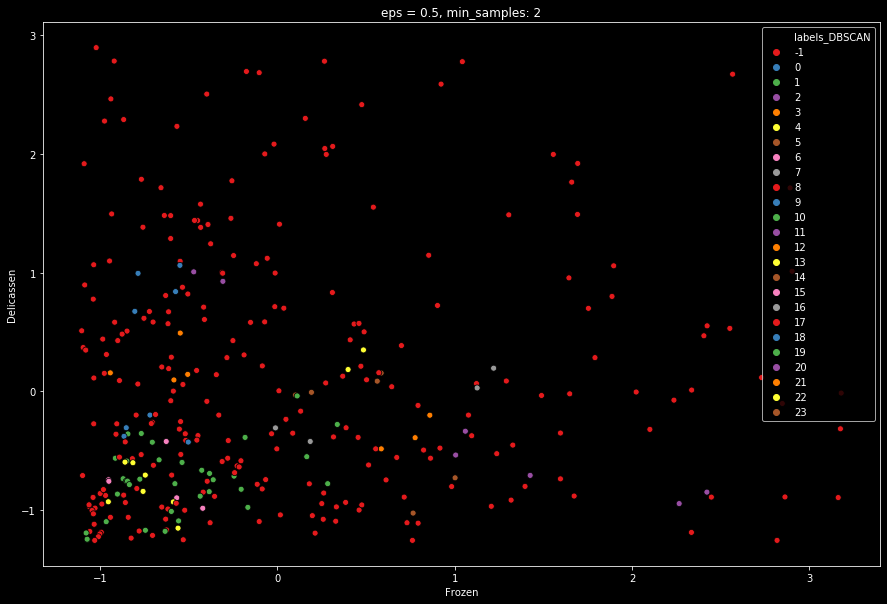

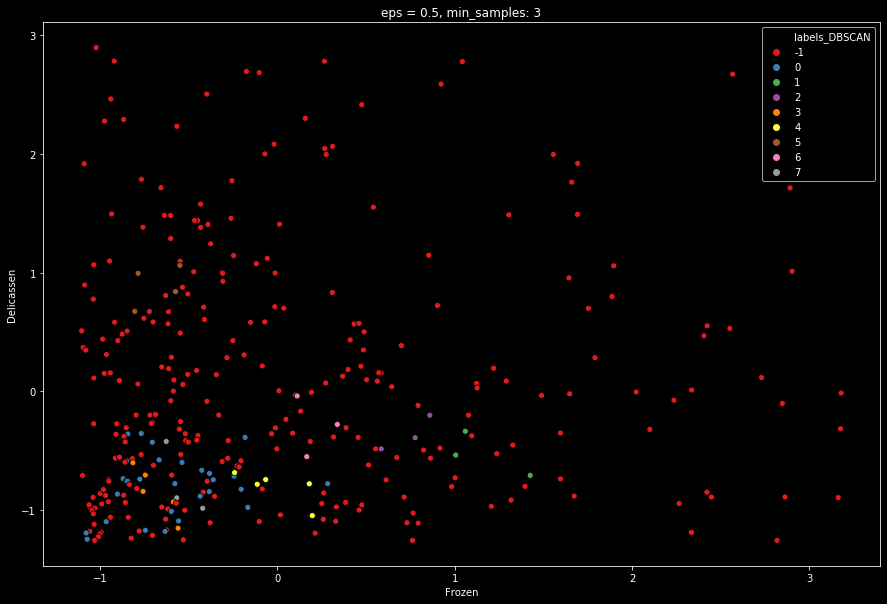

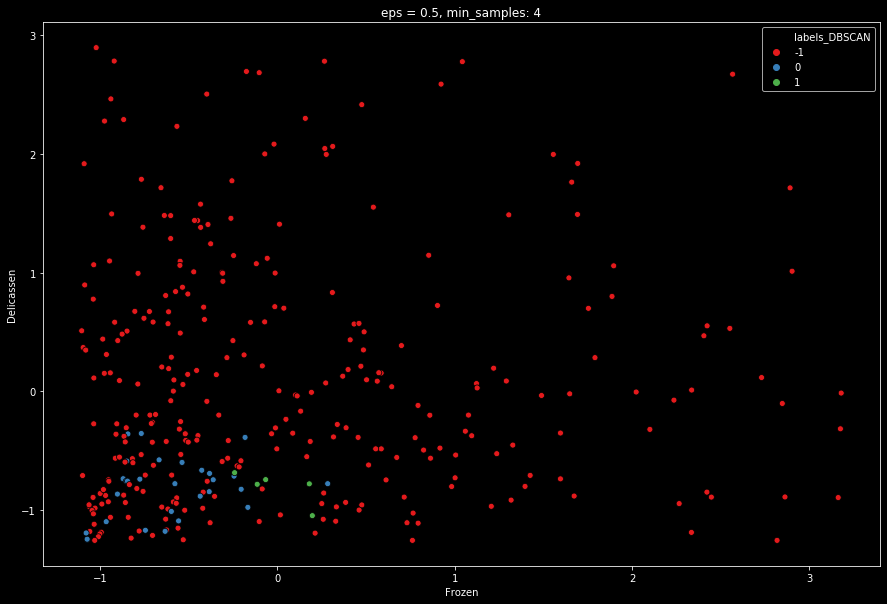

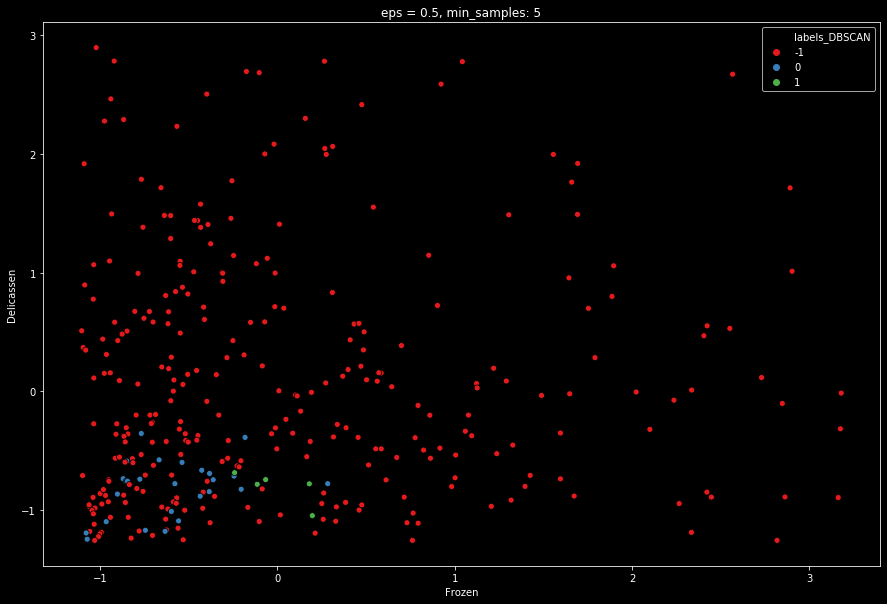

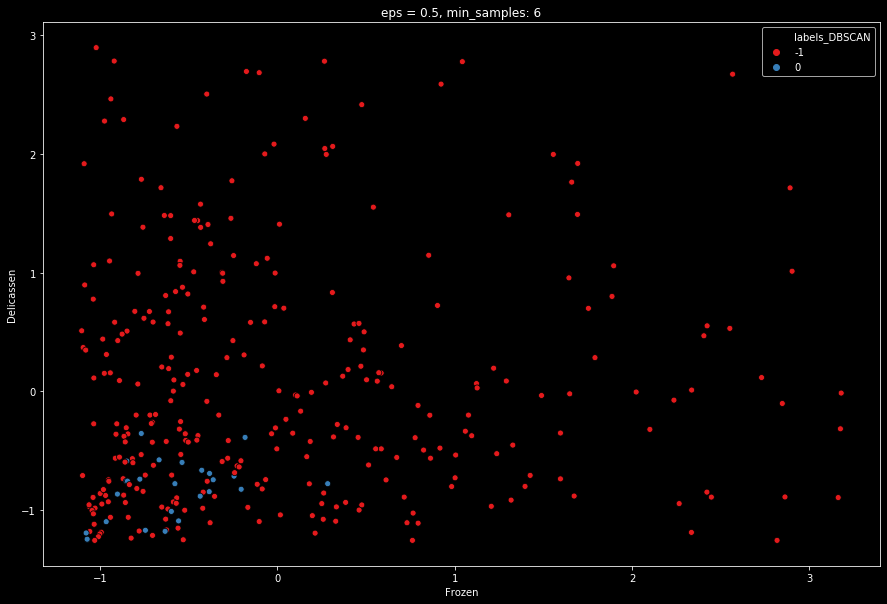

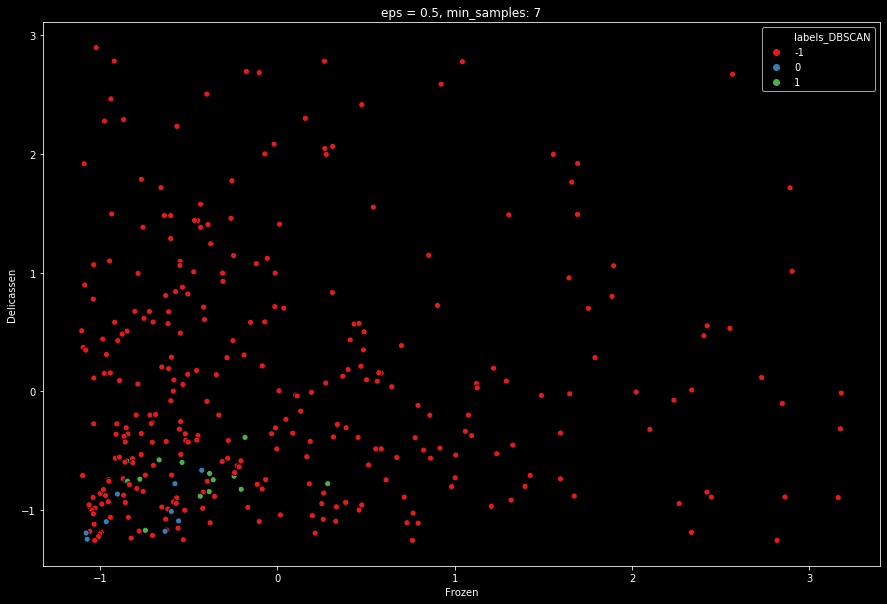

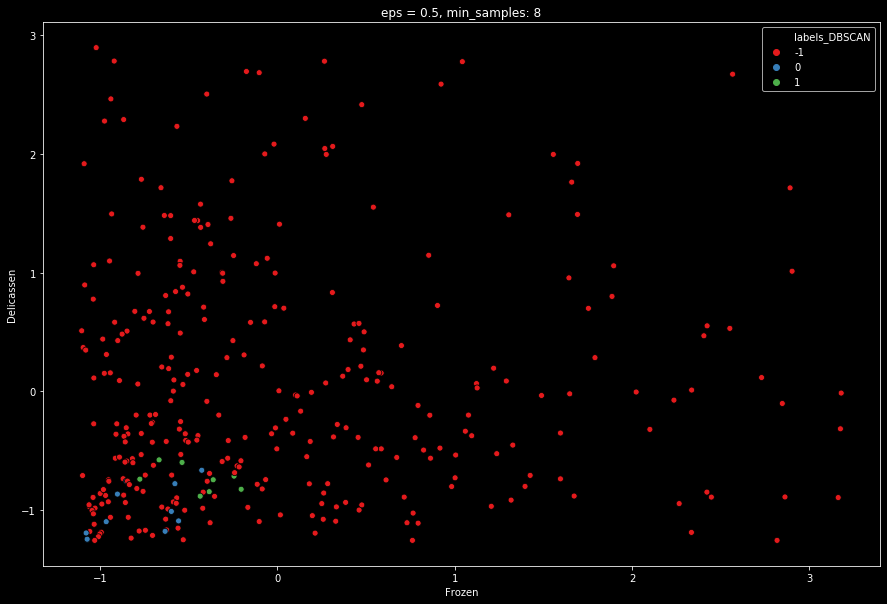

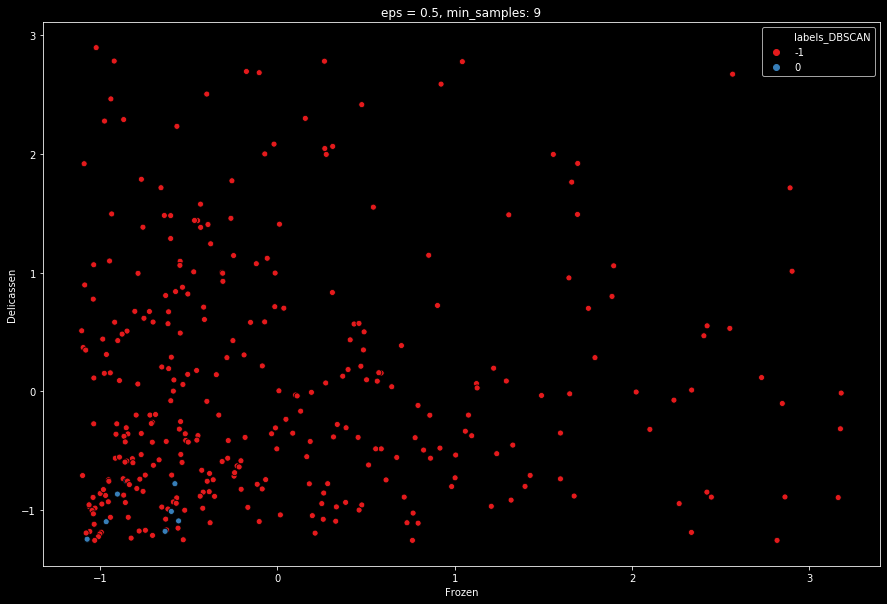

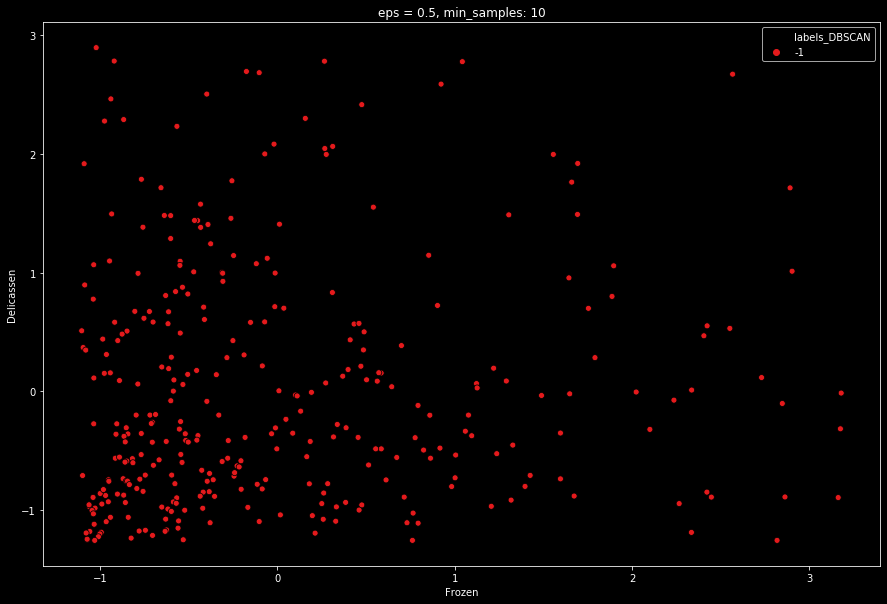

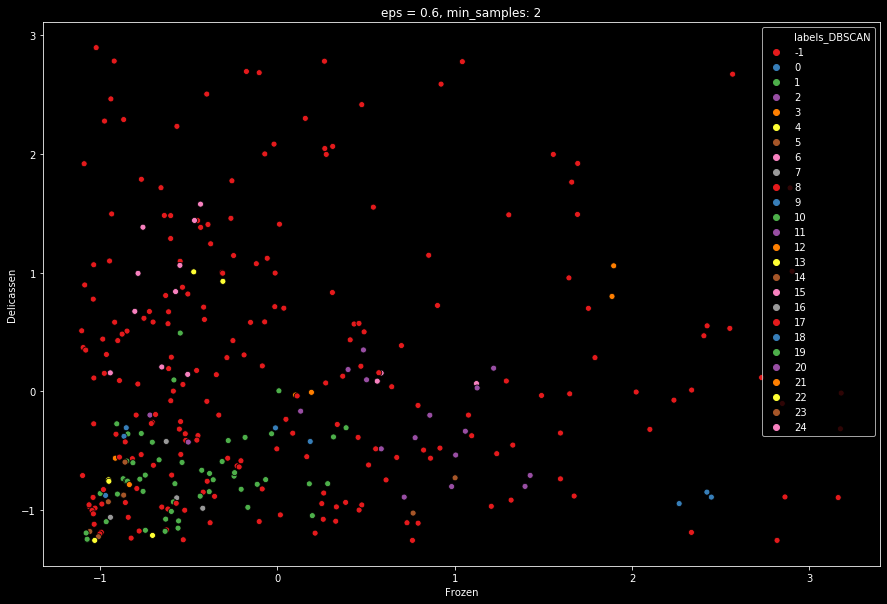

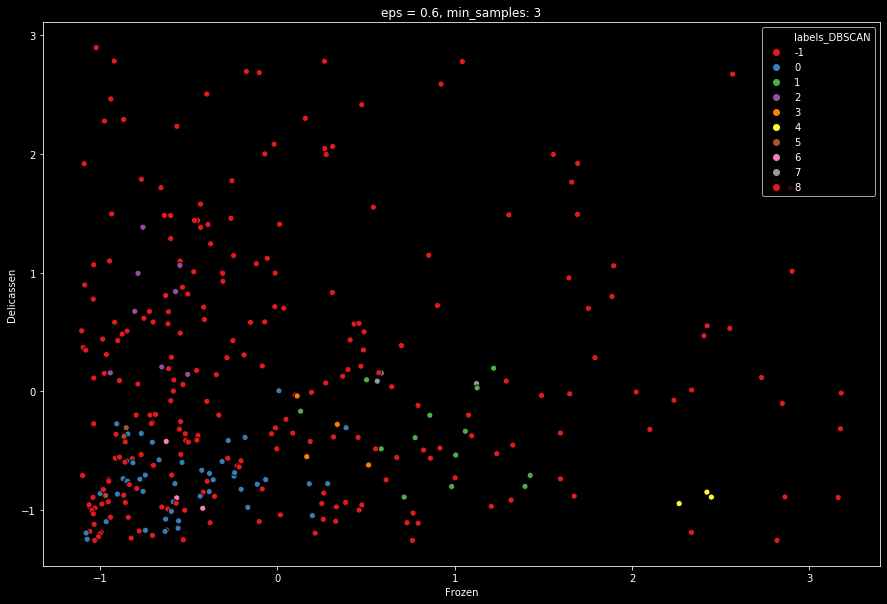

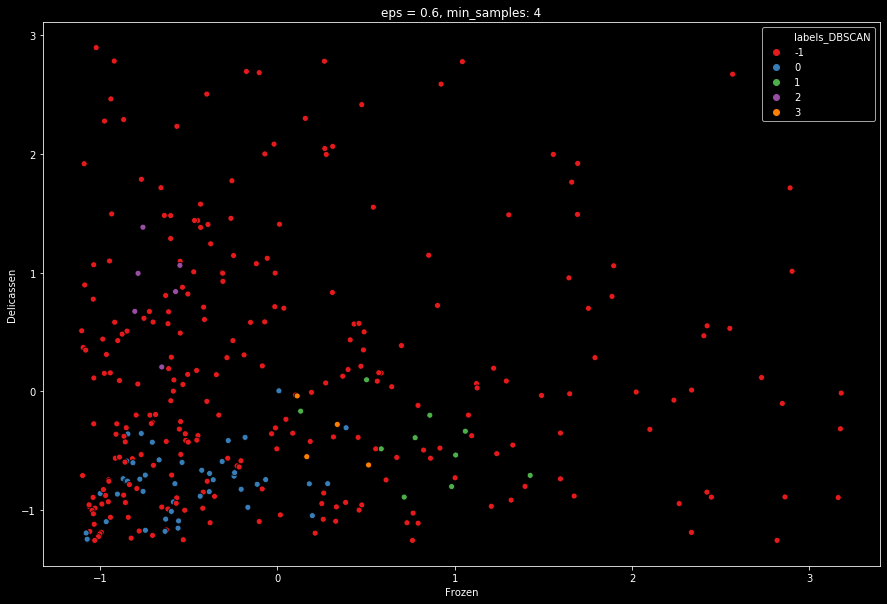

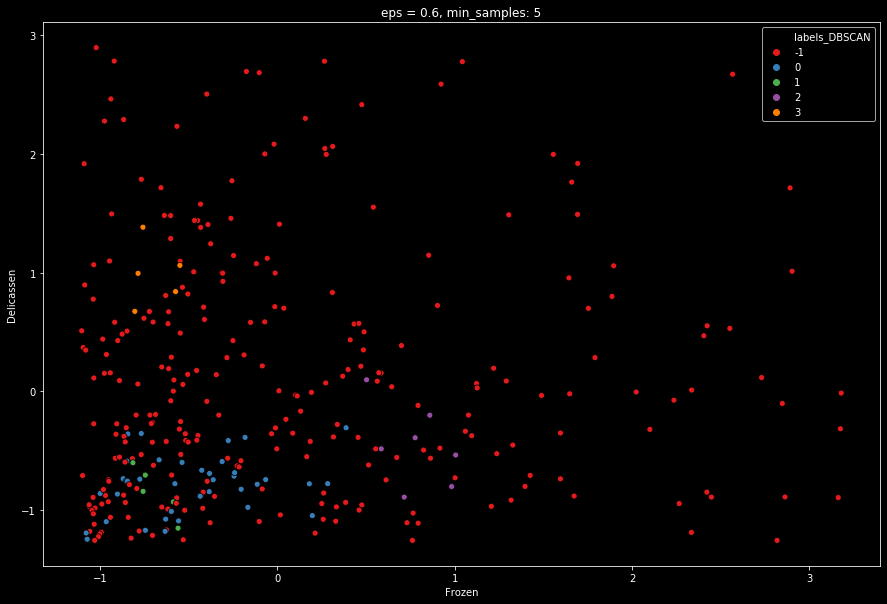

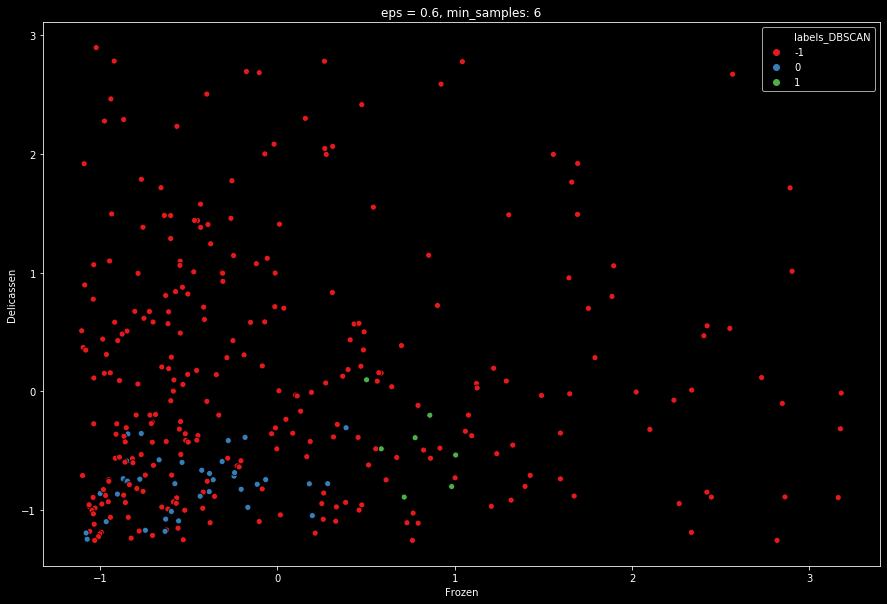

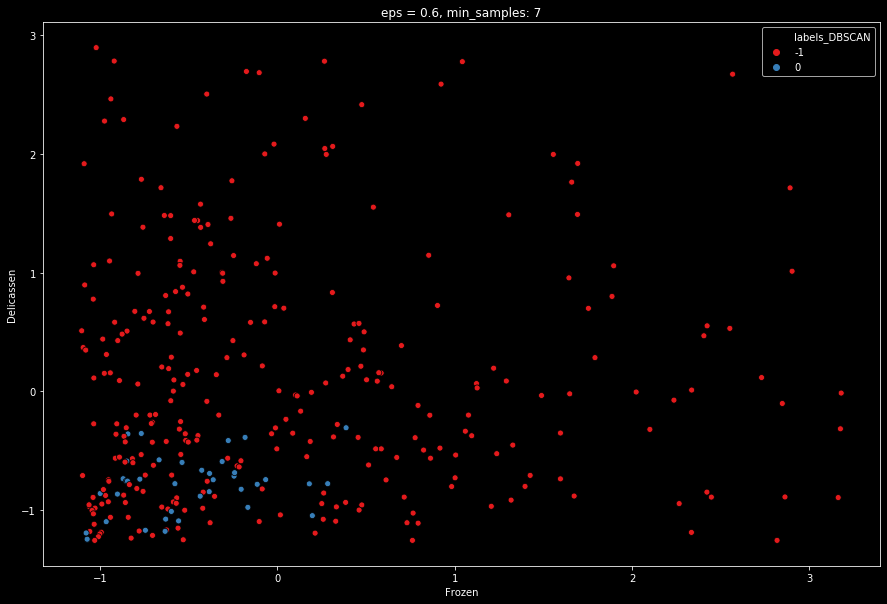

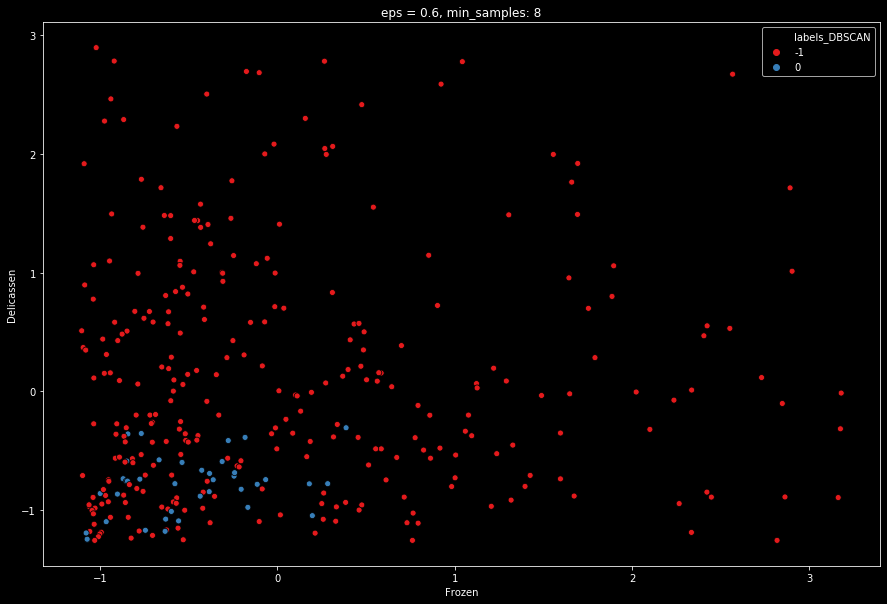

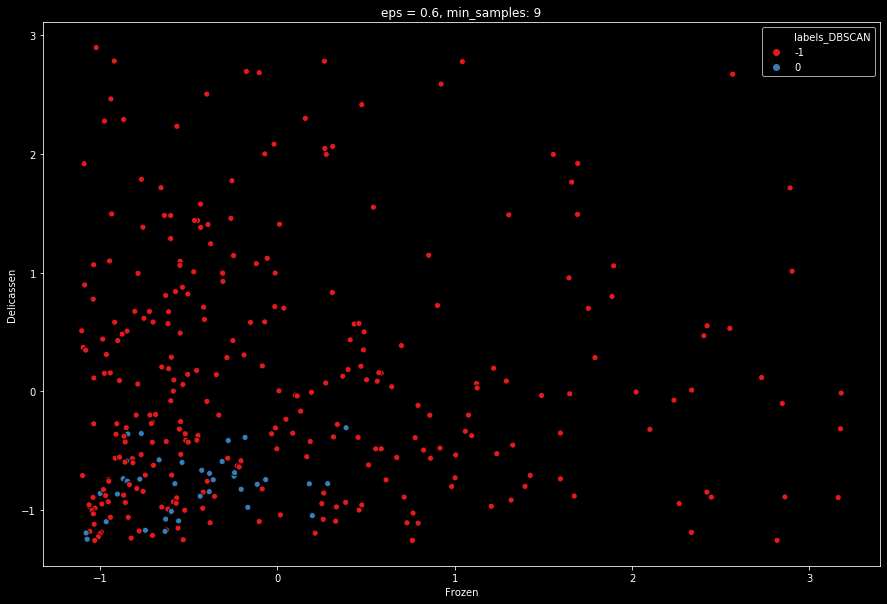

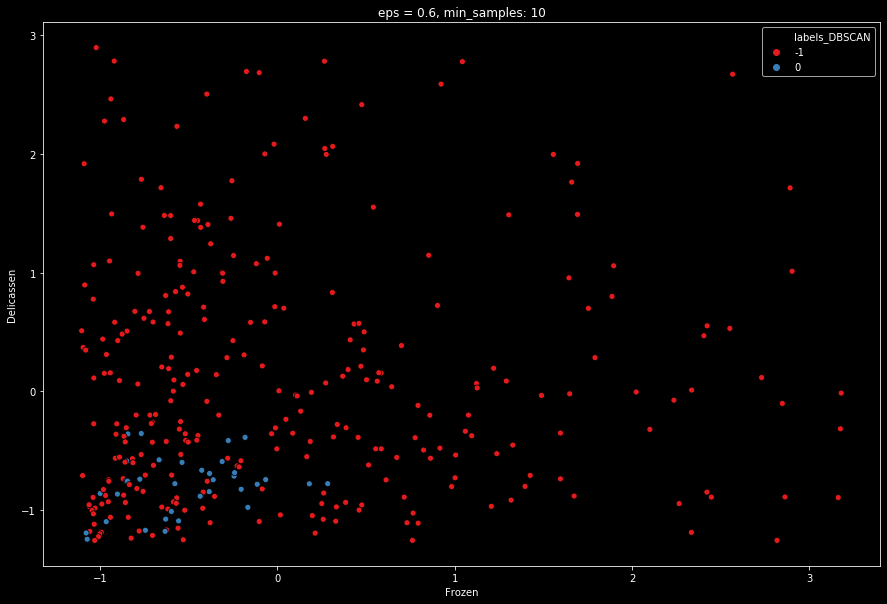

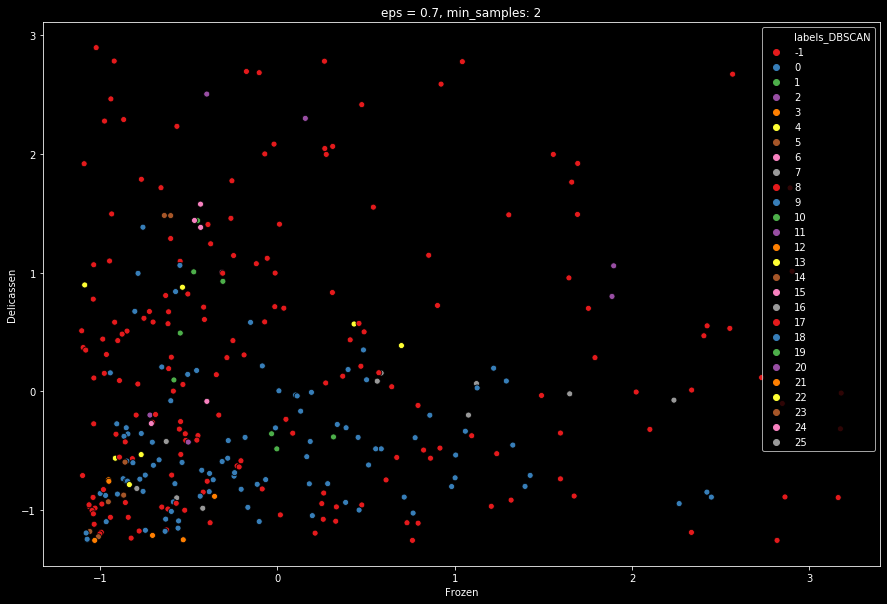

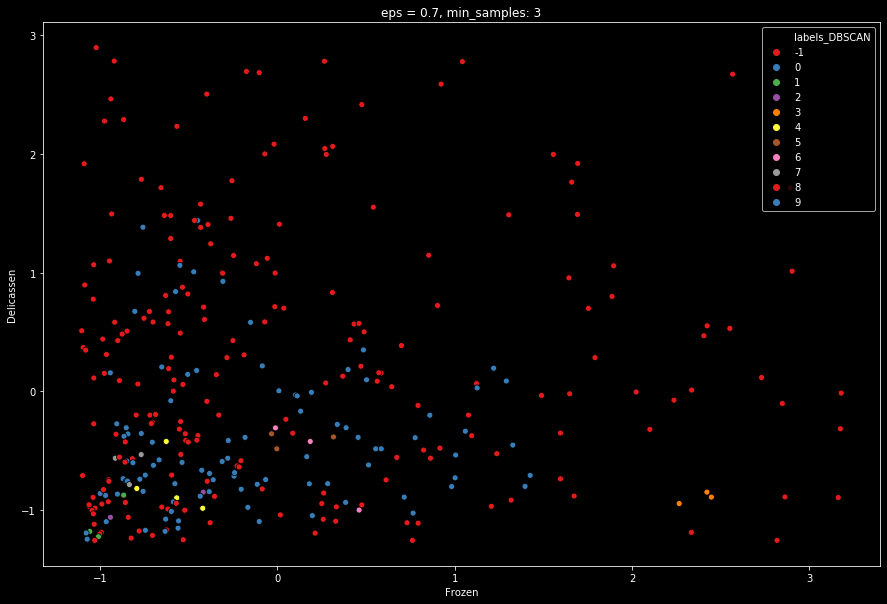

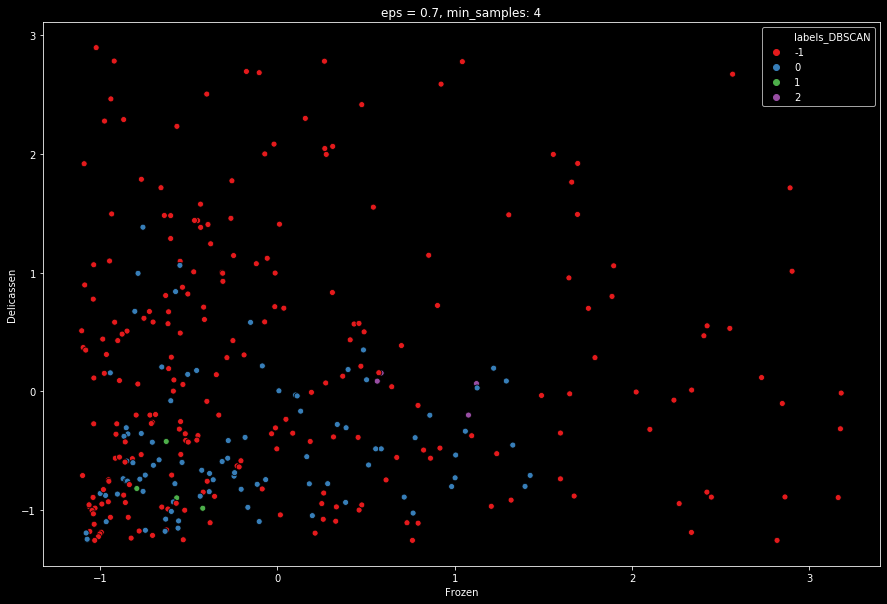

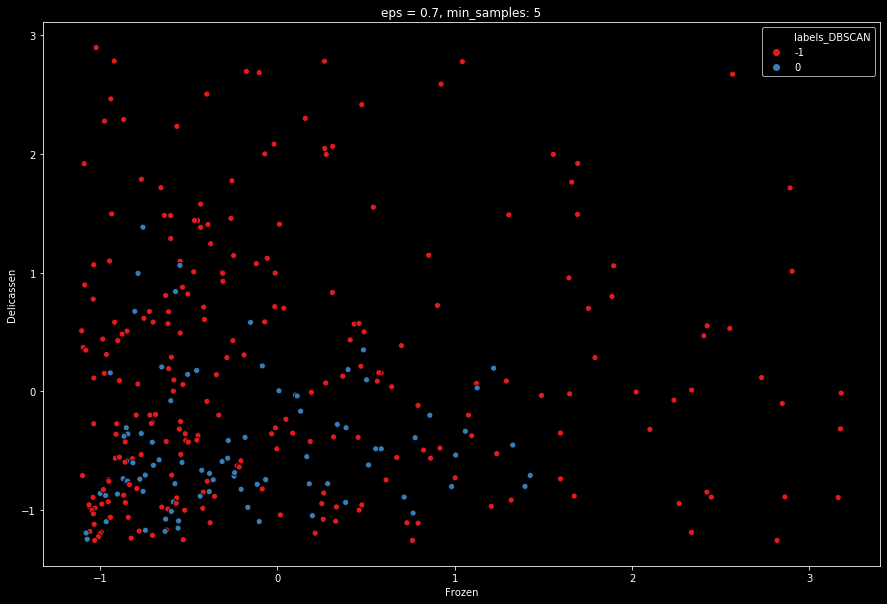

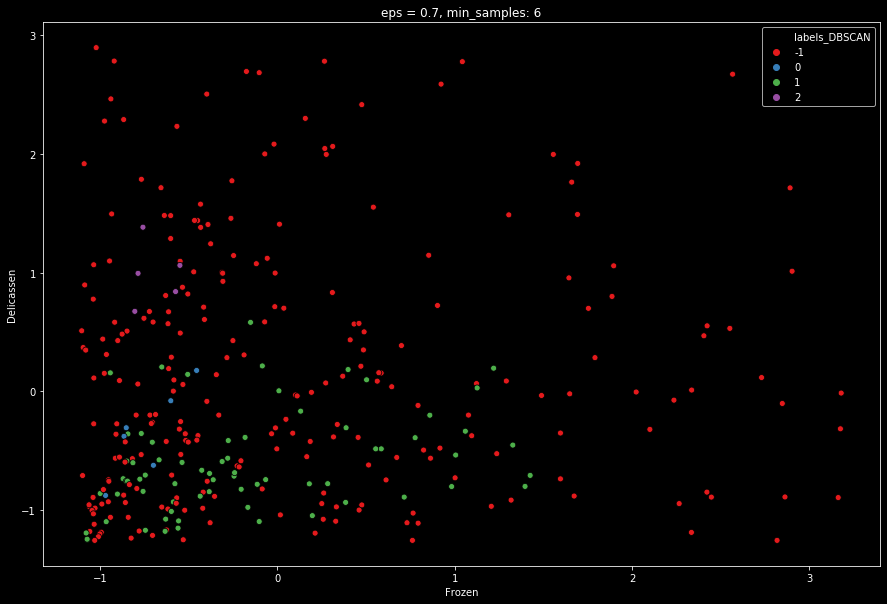

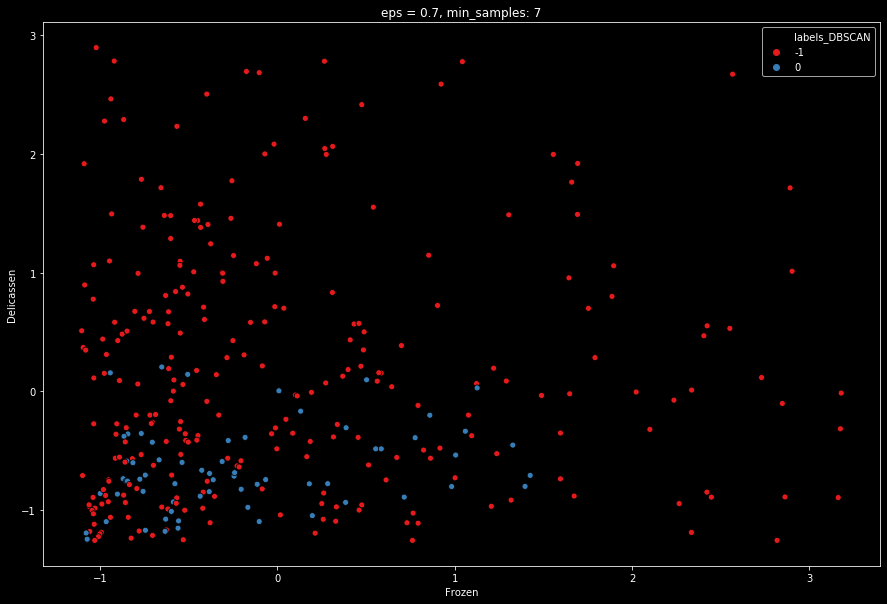

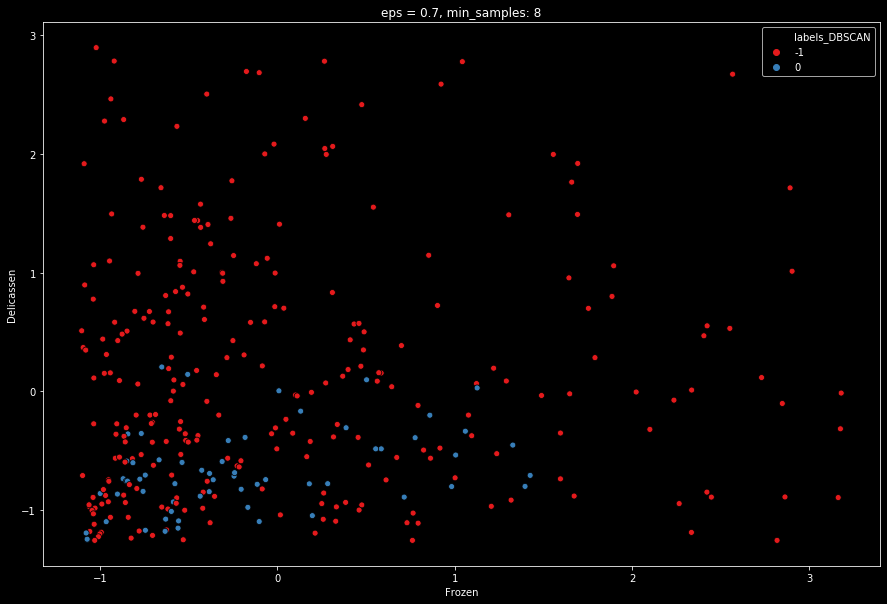

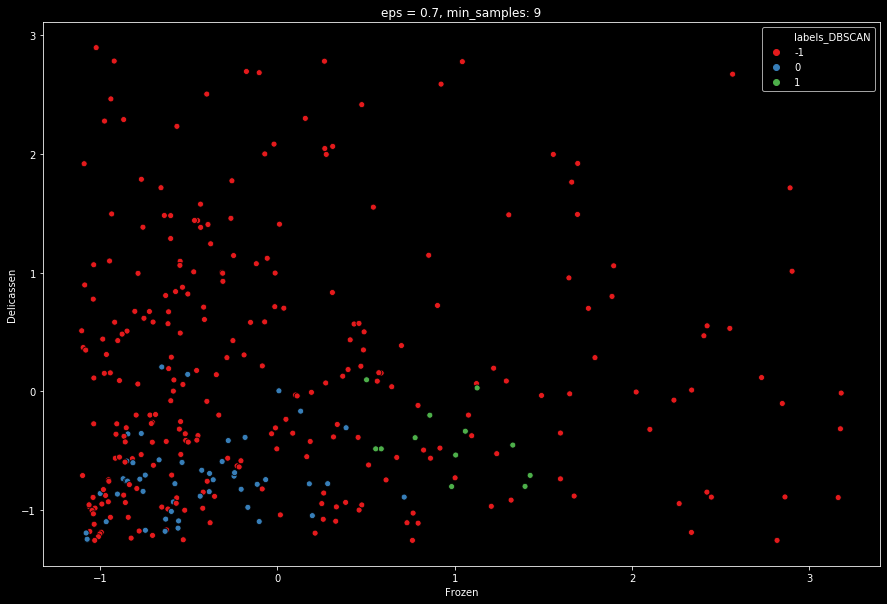

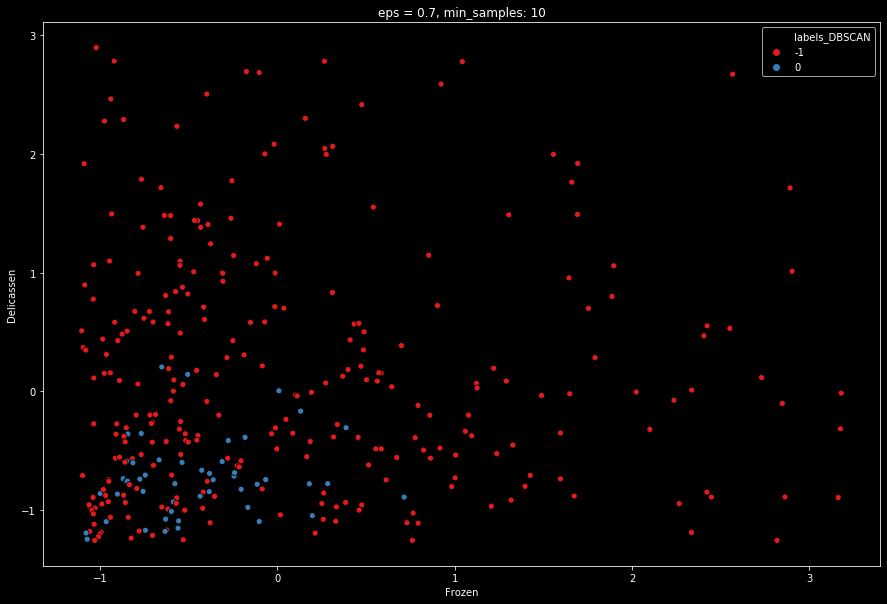

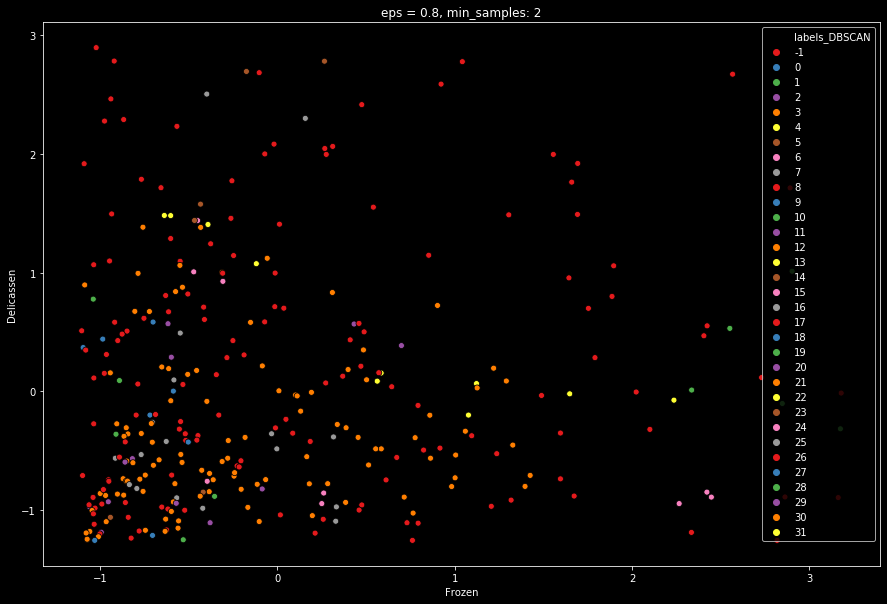

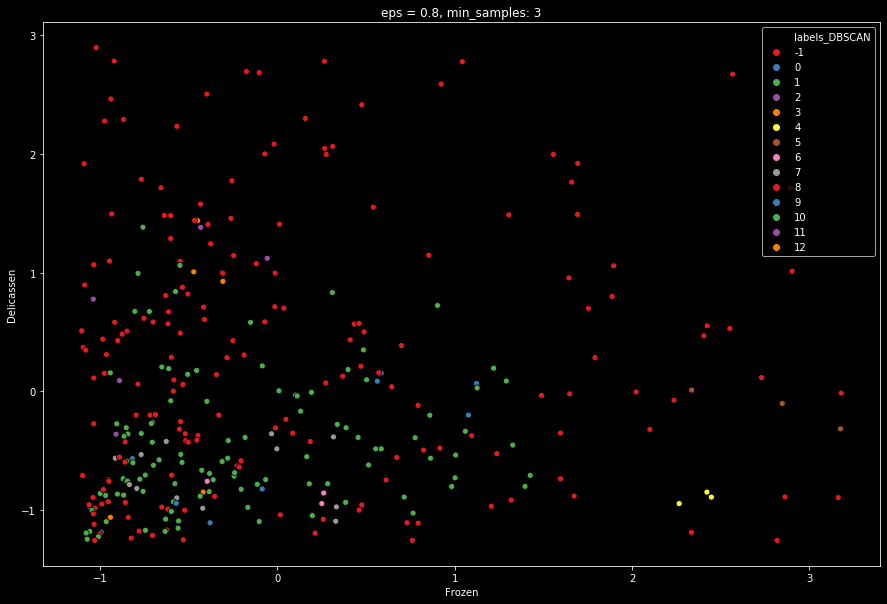

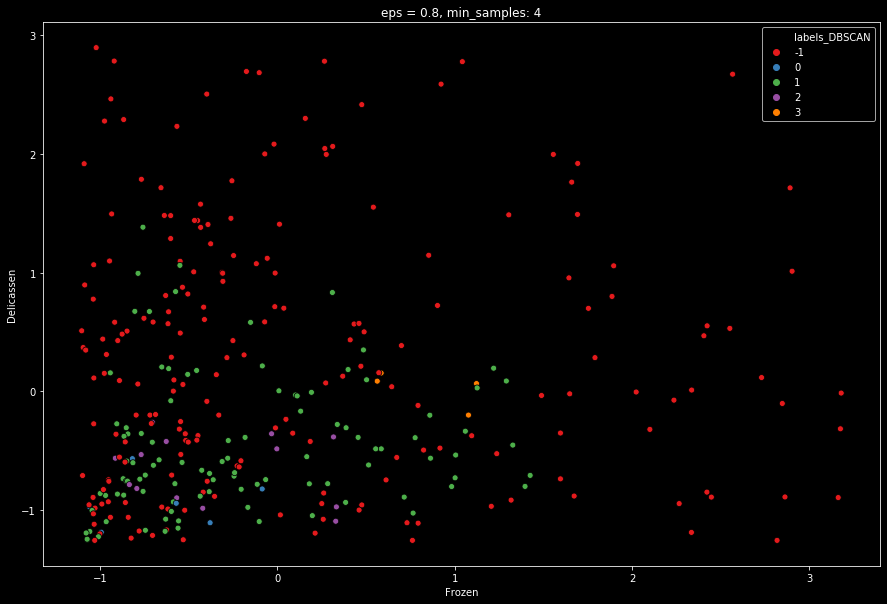

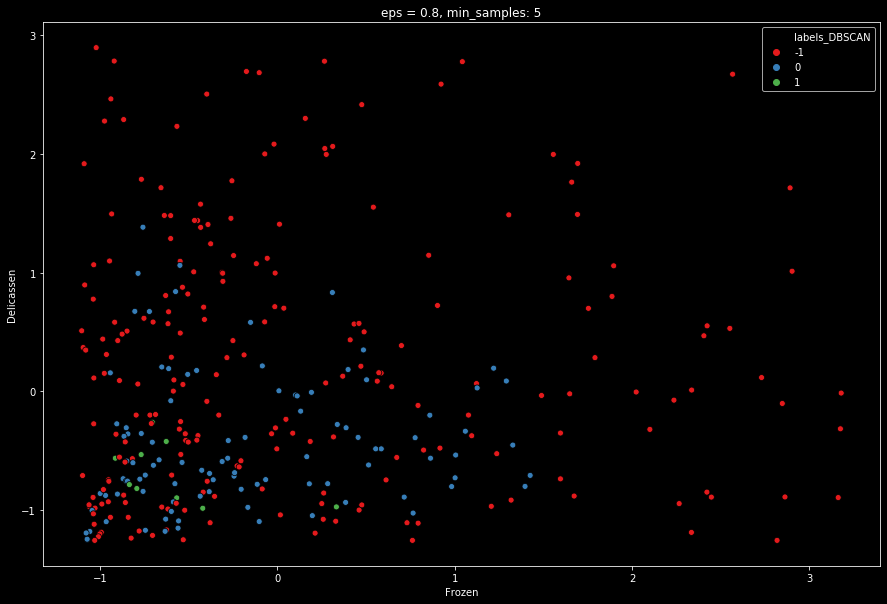

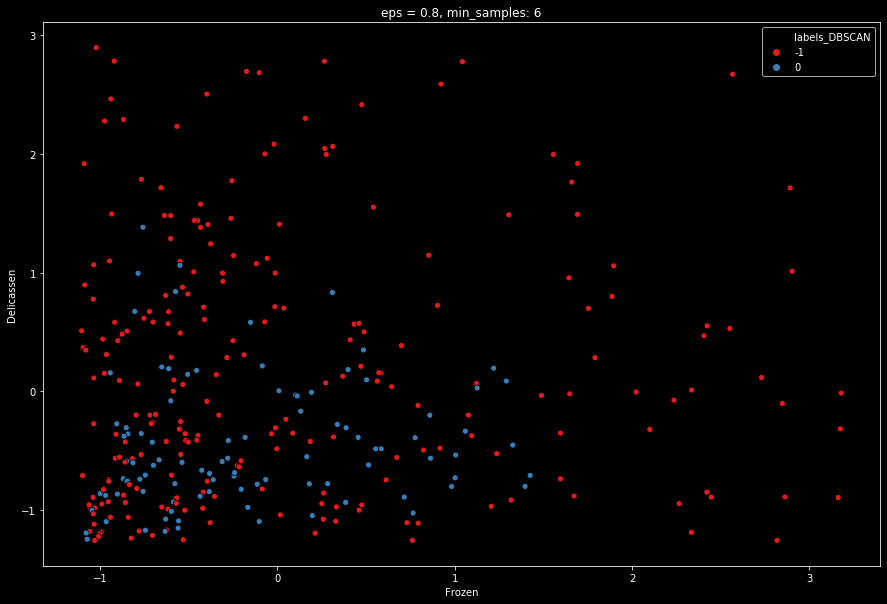

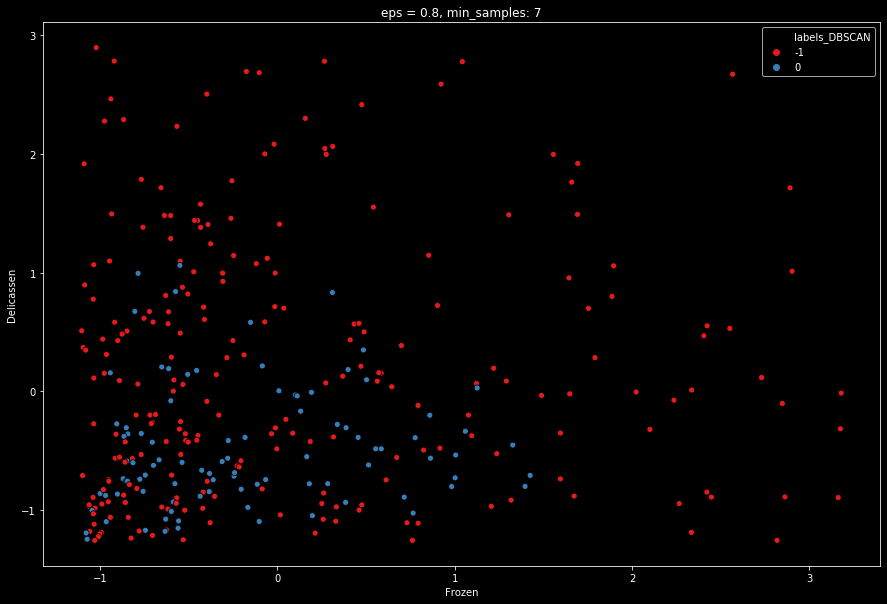

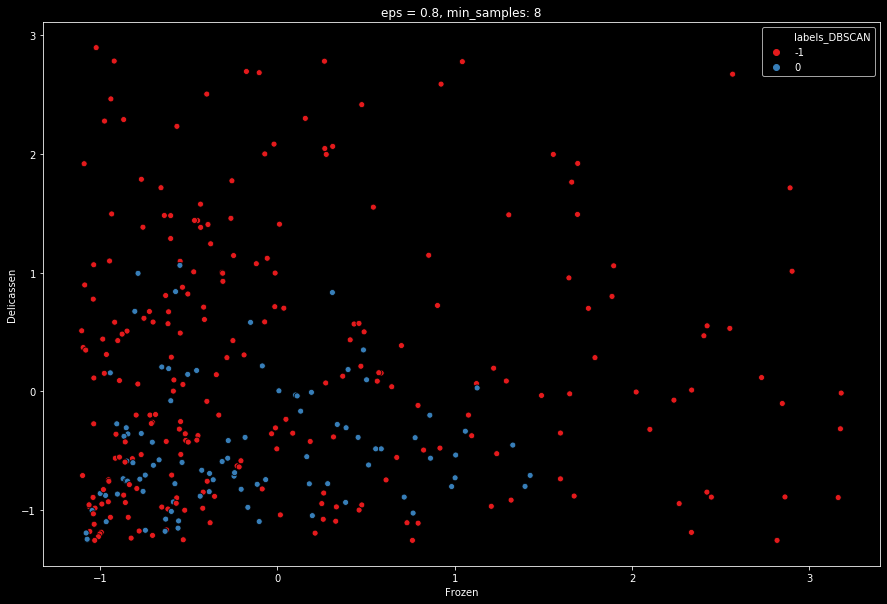

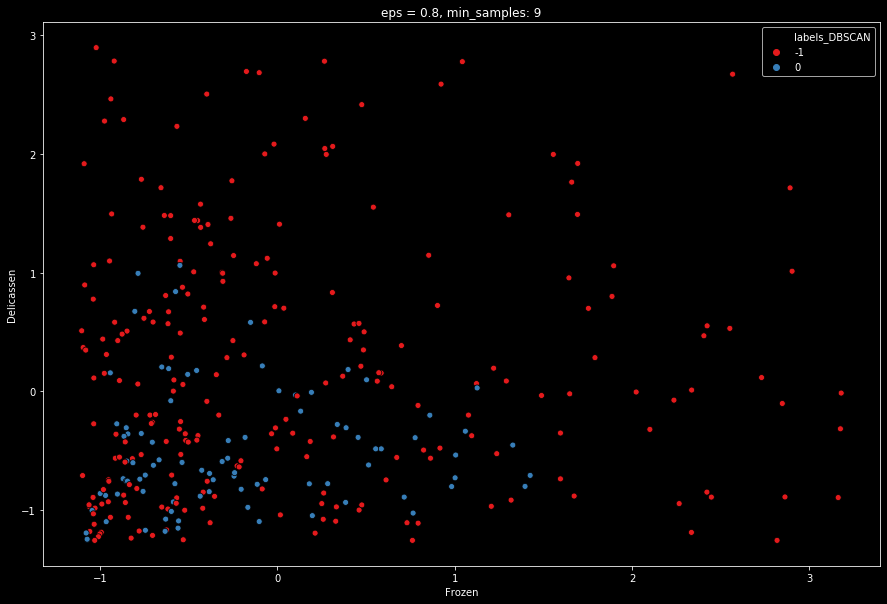

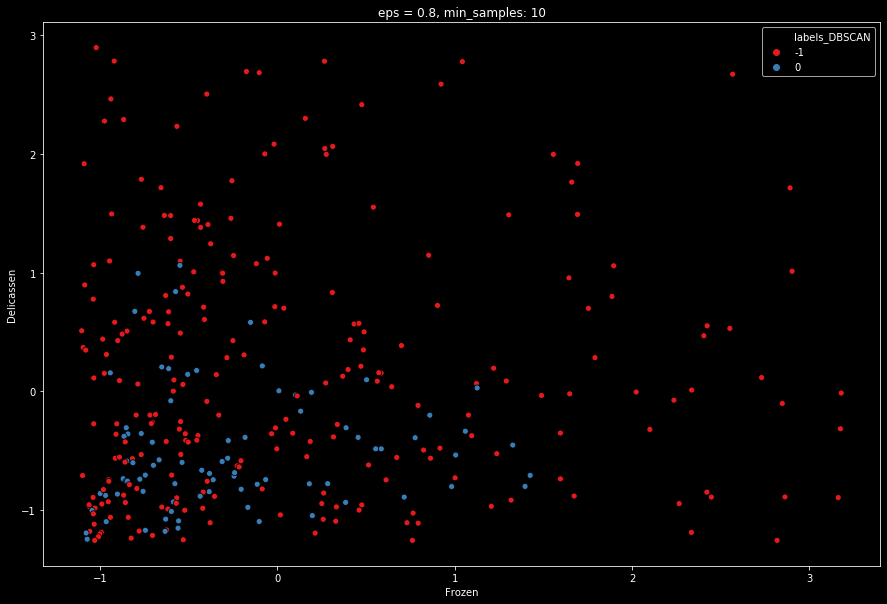

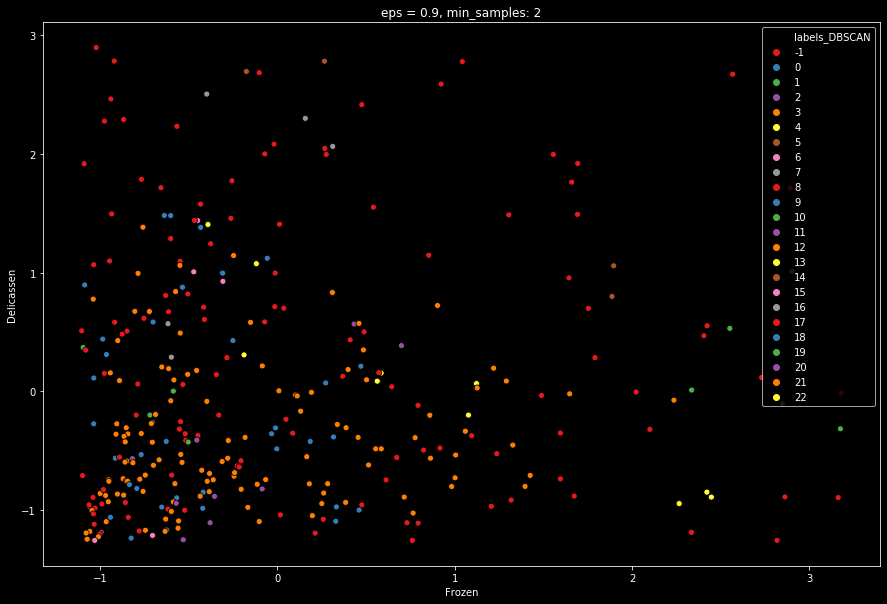

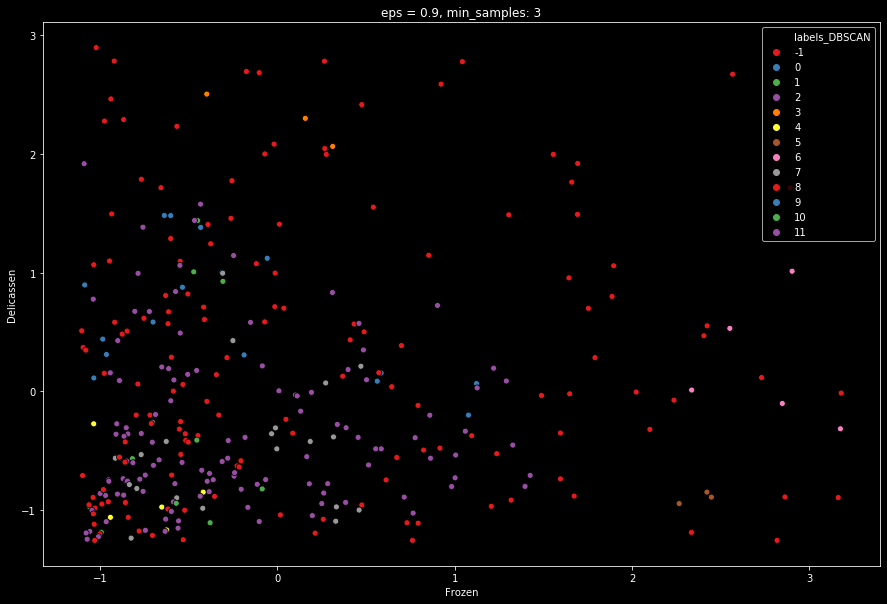

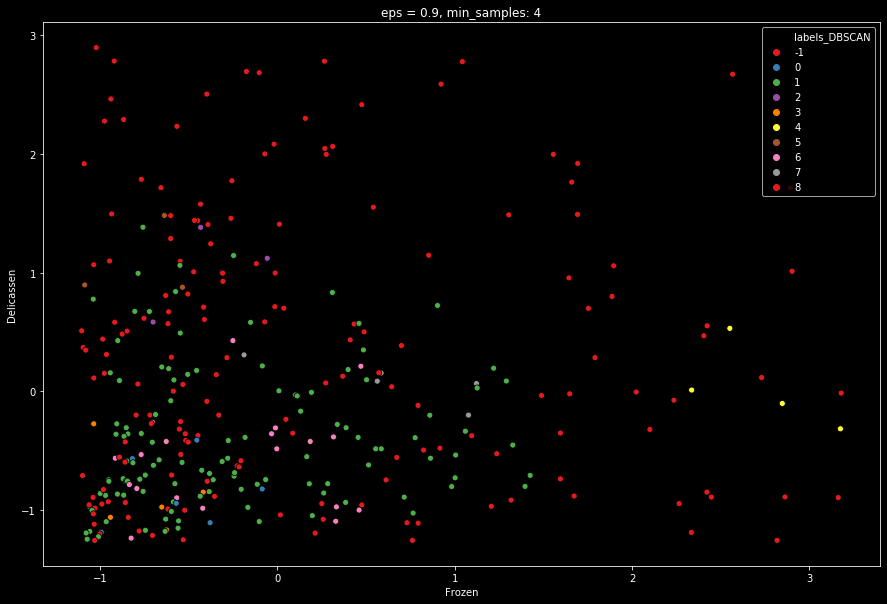

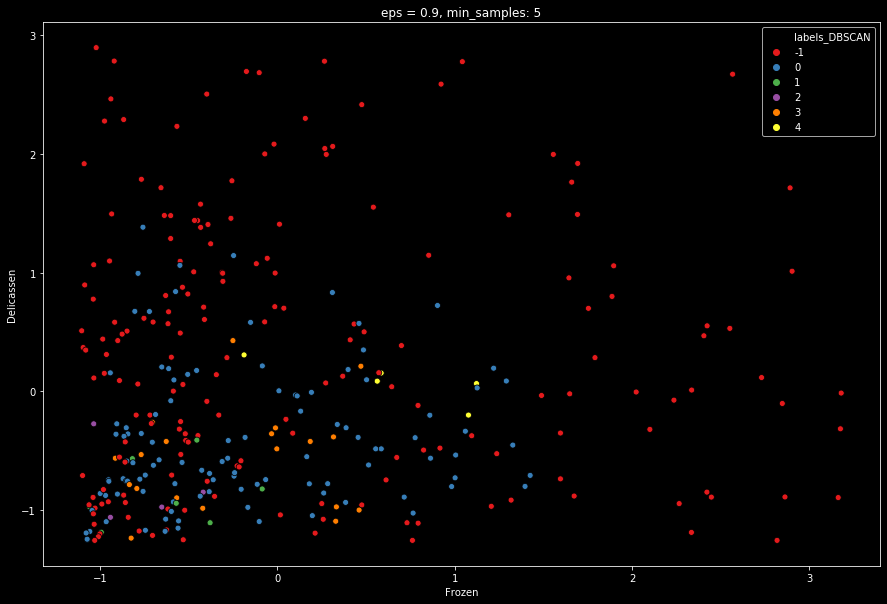

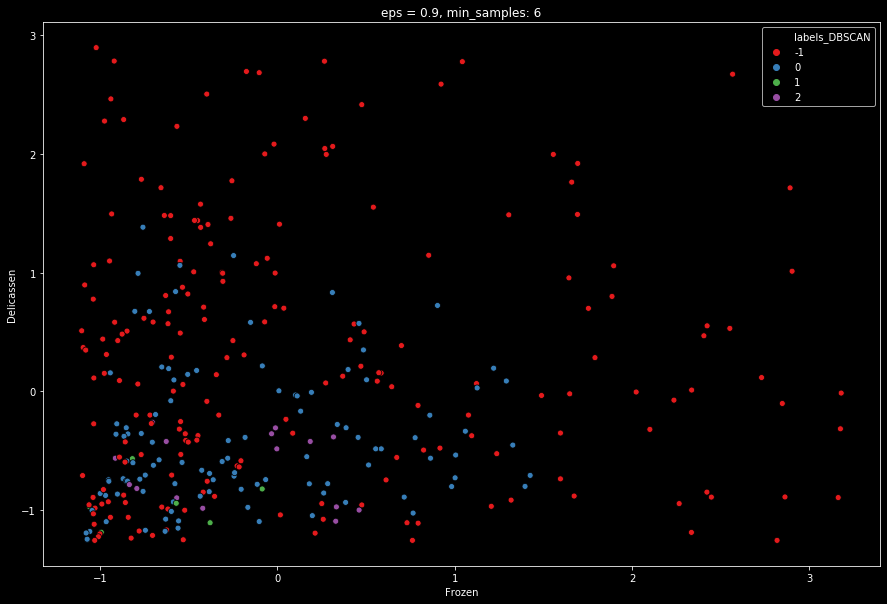

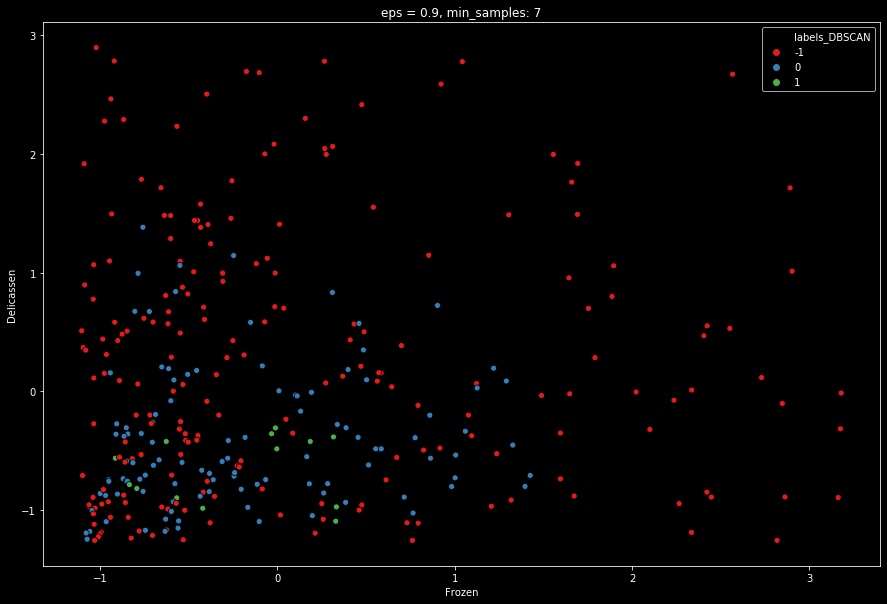

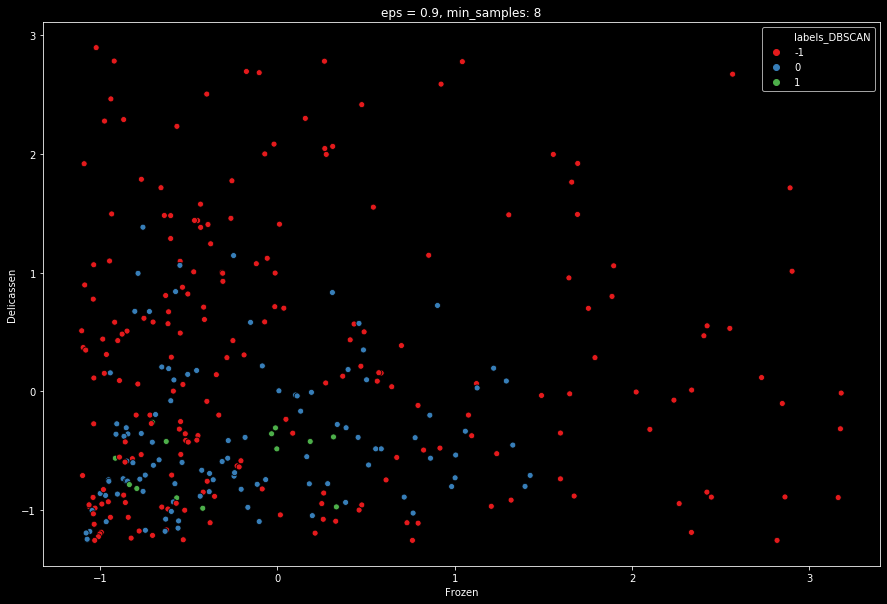

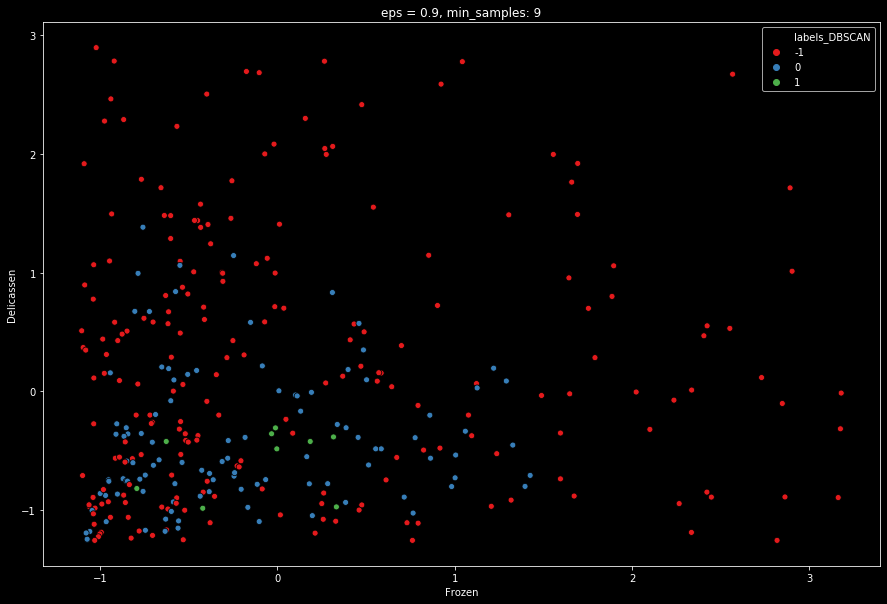

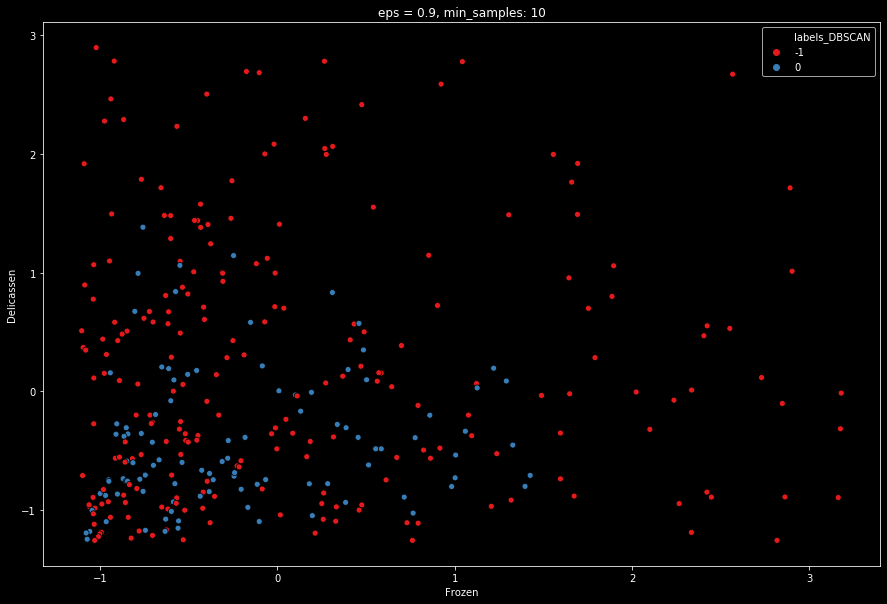

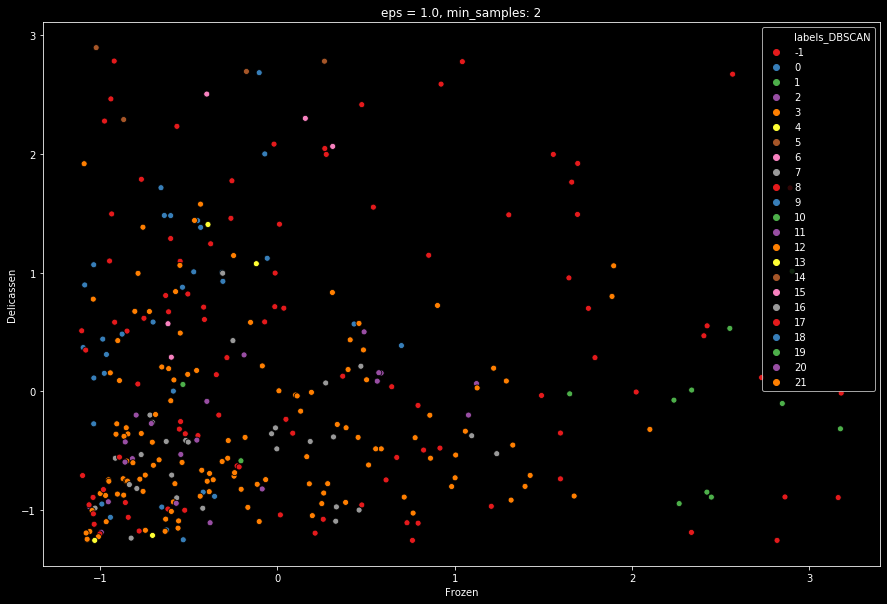

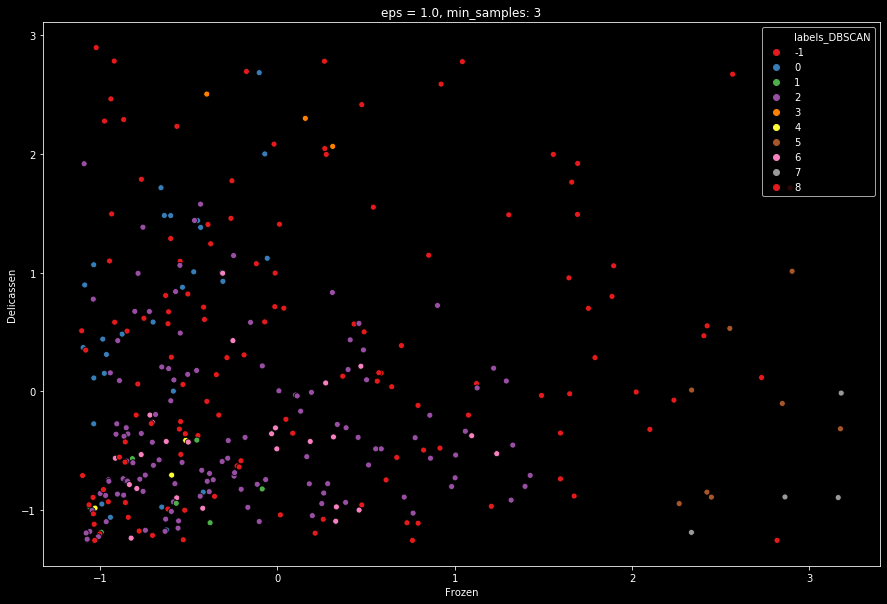

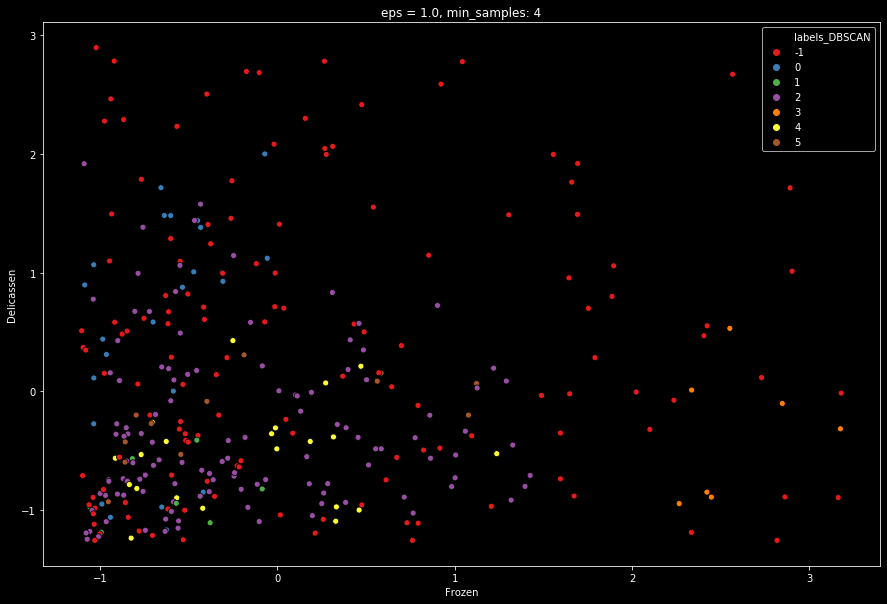

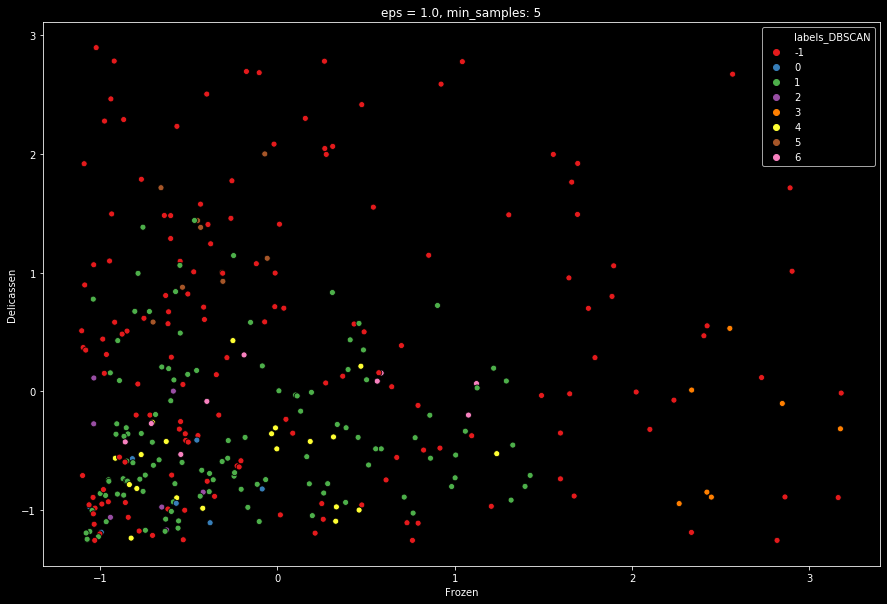

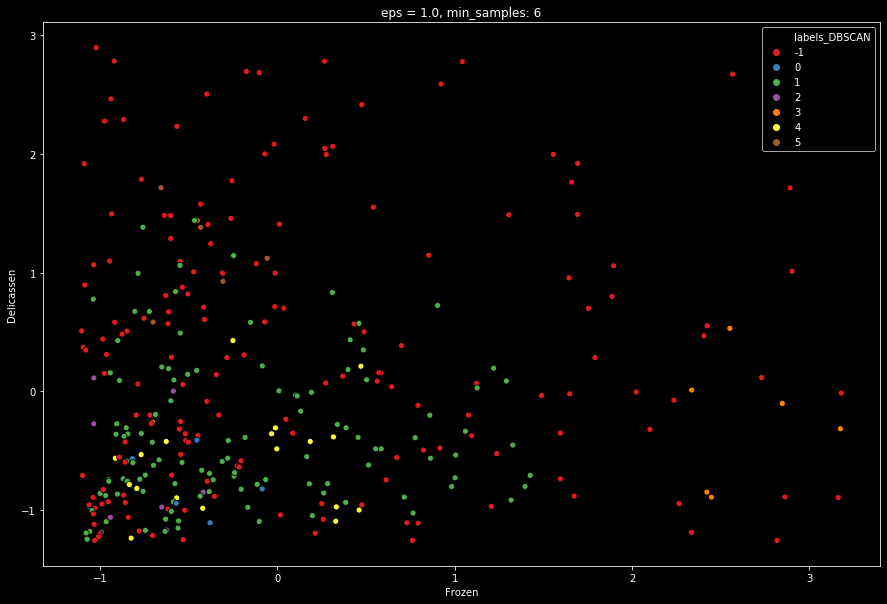

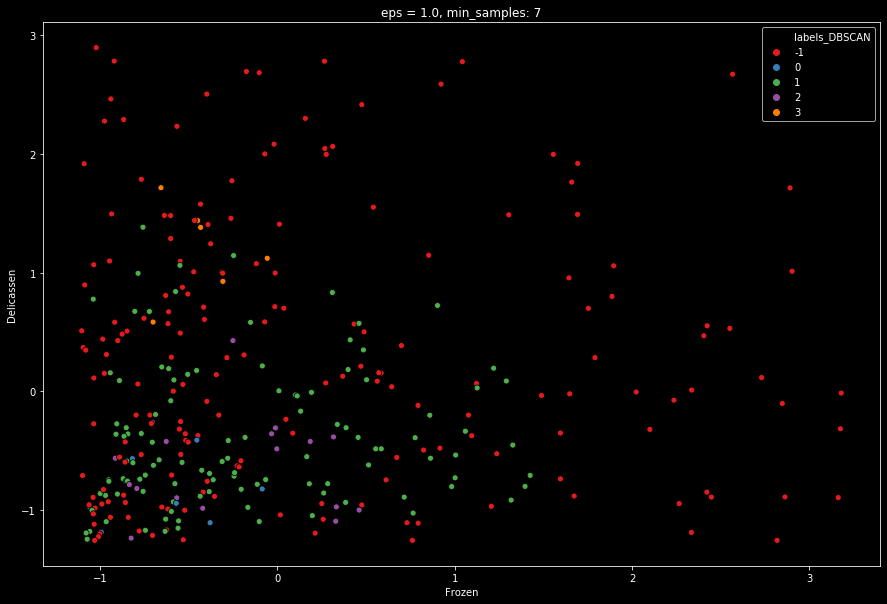

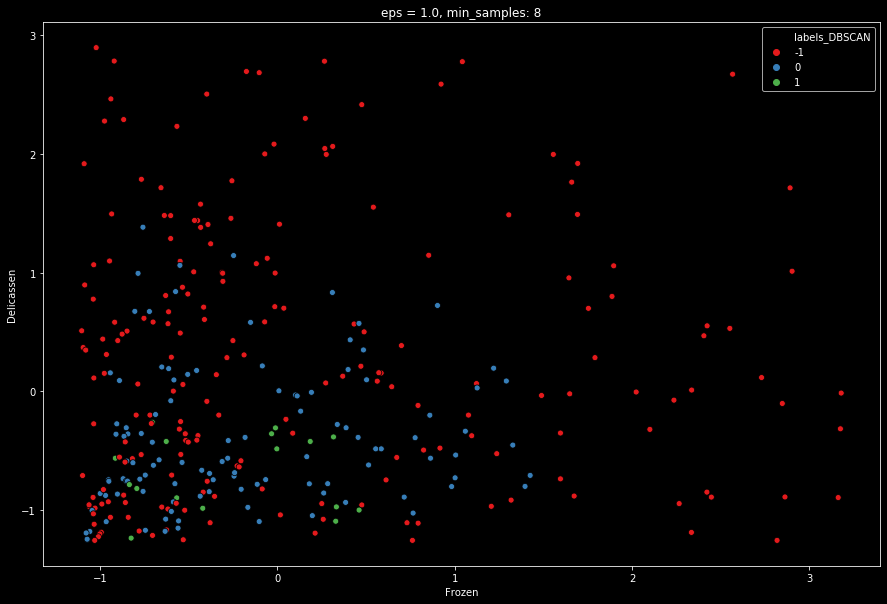

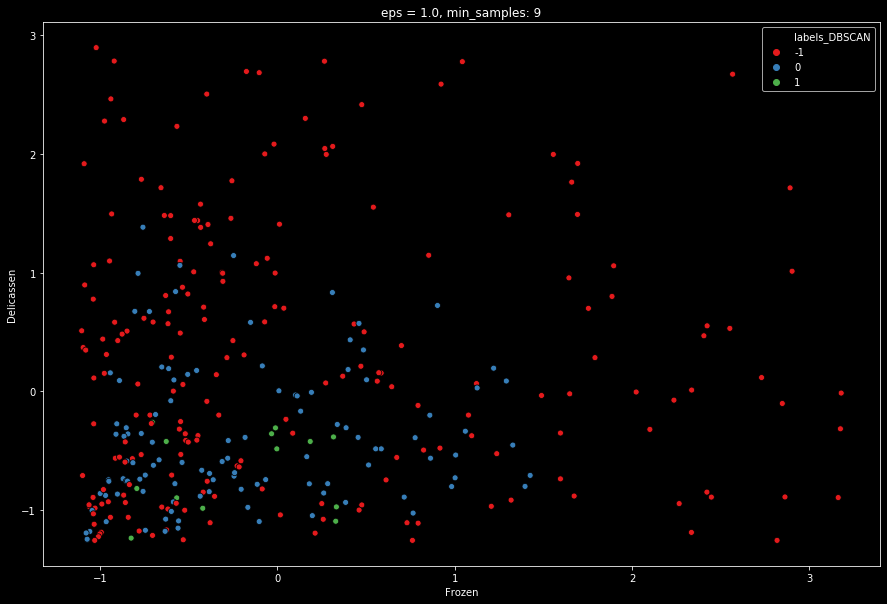

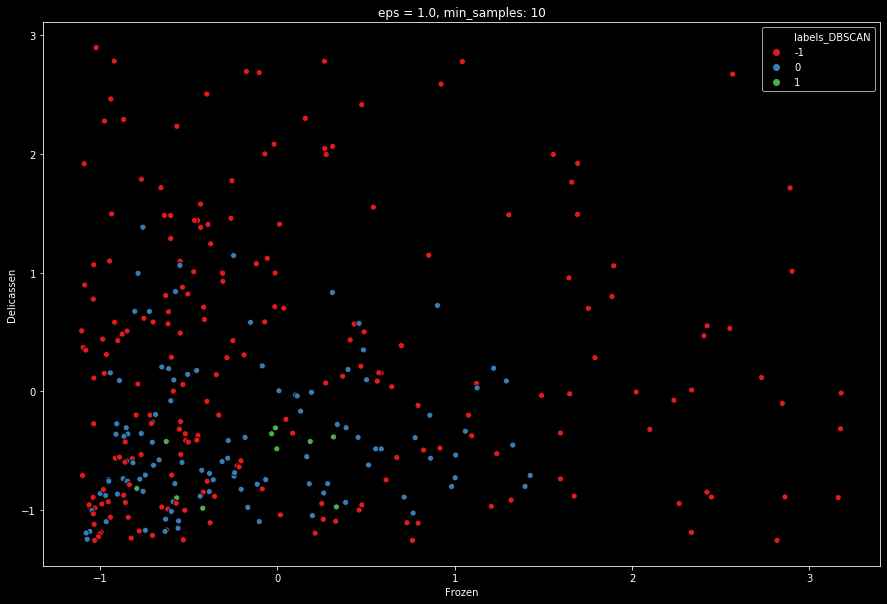

In [77]:
# Your code here
for i in range(1,11):
    for j in range(2, 11):
        data_bonus = data_scaled.drop(data_scaled.columns[-2:], axis = 1)
        kmeans_model = DBSCAN(eps=i/10, min_samples=j).fit(data_bonus)
        data_bonus['labels_DBSCAN'] = kmeans_model.labels_
        #plotting
        fig, scatter = plt.subplots(figsize = (15,10))
        x = 'Frozen'
        y = 'Delicassen'

        scatter = sns.scatterplot(x=x, 
                                    y=y, 
                                    data = data_bonus, 
                                    hue = 'labels_DBSCAN', 
                                    palette = sns.color_palette("Set1", len(data_bonus['labels_DBSCAN'].unique()) ) , 
                                    ec = 'black')
        scatter.set_title(f'eps = {i/10}, min_samples: {j}')

#### Your comment here
I don't like how DBSCAN is performing

# Comparing